### 0. –ò–º–ø–æ—Ä—Ç—ã –∏ –∏–Ω–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from utils.shortcuts import print_deep_mem_usage

In [3]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Ñ–æ—Ä–º–∞—Ç–æ–≤
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',  '{:,.2f}'.format)

sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] =  'medium'
plt.rcParams['xtick.labelsize'] =  'small'
plt.rcParams['ytick.labelsize'] =  'small'
plt.rcParams['legend.title_fontsize'] = 'medium'
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.framealpha'] = .9

### 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ .csv

In [4]:
category_tree = pd.read_csv('../data/category_tree.csv')
events = pd.read_csv('../data/events.csv')
items1 = pd.read_csv('../data/item_properties_part1.csv')
items2 = pd.read_csv('../data/item_properties_part2.csv')

In [5]:
# –û—ä–µ–¥–∏—è–µ–º items –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É
items = pd.concat([items1, items2])
del items1, items2

### 2. –î–µ—Ä–µ–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π (category_tree.csv)

In [6]:
# –í–∏–∑—É–∞–ª—å–Ω—ã–π –æ—Å–º–æ—Ç—Ä
category_tree.head(3)

categoryid  parentid
0        1016    213.00
1         809    169.00
2         570      9.00

In [7]:
# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º —Å—Ç–æ–ª–±—Ü—ã –∏–∑ —ç—Å—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö —Å–æ–æ–±—Ä–∞–∂–µ–Ω–∏–π
category_tree = category_tree.rename(columns={'categoryid': 'category_id',
                                              'parentid': 'parent_id'})

In [8]:
category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category_id  1669 non-null   int64  
 1   parent_id    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [9]:
# –ü—Ä–æ–≤–µ—Ä—è–º –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ category_id
category_tree['category_id'].duplicated().sum()

np.int64(0)

–ü—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –ø—Ä–æ–ø—É—Å–∫–∏ –≤ parent_id -> —Å—É–¥—è –ø–æ –≤—Å–µ–º—É —ç—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ '–≤–µ—Ä—Ö–Ω–µ–≥–æ' —É—Ä–æ–≤–Ω—è.  

__NB: –ø—Ä–∏–∏–º–µ–º, —á—Ç–æ –¥–µ—Ä–µ–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —É –Ω–∞—Å —Ä–∞—Å—Ç–µ—Ç —Å–≤–µ—Ä—Ö—É –≤–Ω–∏–∑ (!)__

In [10]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è
print(f"Top-level categories: {category_tree['parent_id'].isna().sum()}")

Top-level categories: 25


–î–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –Ω–∞–π–¥–µ–º –≤—Å–µ—Ö –µ—ë '—Ä–æ–¥–∏—Ç–µ–ª–µ–π' –∏ –¥–æ–±–∞–≤–∏–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –ø–µ—Ä–µ—á–µ–Ω—å –≤ —Å—Ç–æ–ª–±–µ—Ü `parents`.


In [11]:
# –°–æ–∑–¥–∞–µ–º –ø—É—Å—Ç–æ–π —Å—Ç–æ–ª–±–µ—Ü 'parents'
category_tree['parents'] = pd.NA

# –ü–æ–ª—É—á–∏–º —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ —Ç–∞–±–ª–∏—Ü—ã –≤ –≤–∏–¥–µ —Å–ø–∏—Å–∫–∞ –∫–æ—Ä—Ç–µ–∂–µ–π (category_id, parent_id)
categories = list(category_tree[['category_id', 'parent_id']]
                  .itertuples(index=False))

# –í—Ä–µ–º–µ–Ω–Ω–æ –ø–æ–º–µ–Ω—è–µ–º –∏–Ω–¥–µ–∫—Å —Ç–∞–±–ª–∏—Ü—ã –Ω–∞ 'category_id'
category_tree.set_index('category_id', inplace=True)

# –ò—Ç–µ—Ä–∏—Ä—É–µ–º, –ø–æ–∫–∞ –≤ —Å–ø–∏—Å–∫–µ –∫–æ—Ä—Ç–µ–∂–µ–π –µ—Å—Ç—å —ç–ª–µ–º–µ–Ω—Ç—ã (–Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏)
while(categories_left := len(categories)):

    # –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–æ–ø–∏–∏ (!) —Å–ø–∏—Å–∫–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
    for category_id, parent_id in list(categories):
        
        # –ï—Å–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è
        # –ò –µ–µ —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –µ—â–µ –Ω–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞ (–Ω–µ —Ä–∞–∑–º–µ—á–µ–Ω–∞ –≤ —Ç–∞–±–ª–∏—Ü–µ)
        # –ø–µ—Ä–µ—Ö–æ–¥–∏–º –∫ —Å–ª–µ–¥—É—é—â–µ–π
        if (
            pd.notna(parent_id) 
            and parent_id not in (
               category_tree[category_tree['parents'].notna()].index
            )
        ):
            continue

        # –î–ª—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –∫—Ä–æ–º–µ –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è, —Å–ø–∏—Å–æ–∫ —Ä–æ–¥–∏—Ç–µ–ª–µ–π —ç—Ç–æ:
        # —Ä–æ–¥–∏—Ç–µ–ª–∏ —Ä–æ–¥–∏—Ç–µ–ª—è –ø–ª—é—Å —Å–∞–º —Ä–æ–¥–∏—Ç–µ–ª—å :)
        # –ê –¥–ª—è –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è —Å–ø–∏—Å–æ–∫ —Ä–æ–¥–∏—Ç–µ–ª–µ–π –ø—É—Å—Ç–æ–π.
        category_tree.at[category_id, 'parents'] = (
            category_tree.at[parent_id, 'parents'] + [int(parent_id)]
            if pd.notna(parent_id) else []
        )
            
        # –£–¥–∞–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏—é –∏–∑ —Å–ø–∏—Å–∫–∞ –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö 
        categories.pop(categories.index((category_id, parent_id)))

    # –ï—Å–ª–∏ –ø–æ—Å–ª–µ –ø—Ä–æ—Ö–æ–¥–∞ —á–∏—Å–ª–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ —Å–ø–∏—Å–∫–µ –Ω–µ —É–º–µ–Ω—å—à–∏–ª–æ—Å—å
    # —Ç–æ –ø—Ä–µ—Ä—ã–≤–∞–µ–º —Ü–∏–∫–ª (–±–∏—Ç—ã–µ –¥–∞–Ω–Ω—ã–µ: –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ parent_id) 
    if len(categories) == categories_left:
        break

# –í–æ–∑–≤—Ä–∞—â–∞–µ–º 'category_id' –æ–±—Ä–∞—Ç–Ω–æ –≤ —Å—Ç–æ–ª–±—Ü—ã 
category_tree.reset_index(inplace=True)

# –ü–µ—Ä–µ–ø–∞–∫—É–µ–º —Å–ø–∏—Å–∫–∏ –≤ –∫–æ—Ä—Ç–µ–∂–∏
category_tree['parents'] = category_tree['parents'].map(
    lambda x: tuple(x) if isinstance(x, list) else x
)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –≤—Å–µ –ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏:
print(f'Orphan categories: {categories}')

# –í–∏–∑—É–∞–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
category_tree.head(3)

Orphan categories: []


category_id  parent_id            parents
0         1016     213.00  (1532, 1299, 213)
1          809     169.00   (395, 1257, 169)
2          570       9.00      (653, 351, 9)

–î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –∞–Ω–∞–ª–∏–∑–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–µ–º –∏ –¥–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:  
- _`cat_level`_ - —É—Ä–æ–≤–µ–Ω—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: 1 - –¥–ª—è '–≤–µ—Ä—Ö–Ω–µ–≥–æ' —É—Ä–æ–≤–Ω—è, 2 - –¥–ª—è —Å–ª–µ–¥—É—é—â–µ–≥–æ –∏ —Ç.–¥.
- _`has_subcat`_ - –∏–º–µ–µ—Ç –ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è –¥–æ—á–µ—Ä–Ω–∏–µ (–ø–æ–¥)–∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∏–ª–∏ –∂–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Å–∞–º–æ–º '–Ω–∏–∂–Ω–µ–º' —É—Ä–æ–≤–Ω–µ –¥–µ—Ä–µ–≤–∞.
- _`top_cat_id`_ - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è, –∫ –∫–æ—Ç–æ—Ä–æ–π –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –¥–∞–Ω–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è. 

In [12]:
# –î–æ–±–∞–≤–ª—è–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
category_tree['cat_level'] = category_tree['parents'].map(lambda x: len(x) + 1)
category_tree['has_subcat'] = category_tree['category_id'].isin(
    category_tree['parents'].explode().drop_duplicates()
)
category_tree['top_cat_id'] = (
    category_tree[['category_id', 'parents']]
    .apply(lambda x: x.parents[0] if x.parents else x.category_id, axis=1)
)

# –í–∏–∑—É–∞–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞
category_tree.tail(3)

category_id  parent_id          parents  cat_level  has_subcat  \
1666         1336     745.00  (140, 540, 745)          4       False   
1667          689     207.00      (1490, 207)          3       False   
1668          761     395.00           (395,)          2       False   

      top_cat_id  
1666         140  
1667        1490  
1668         395

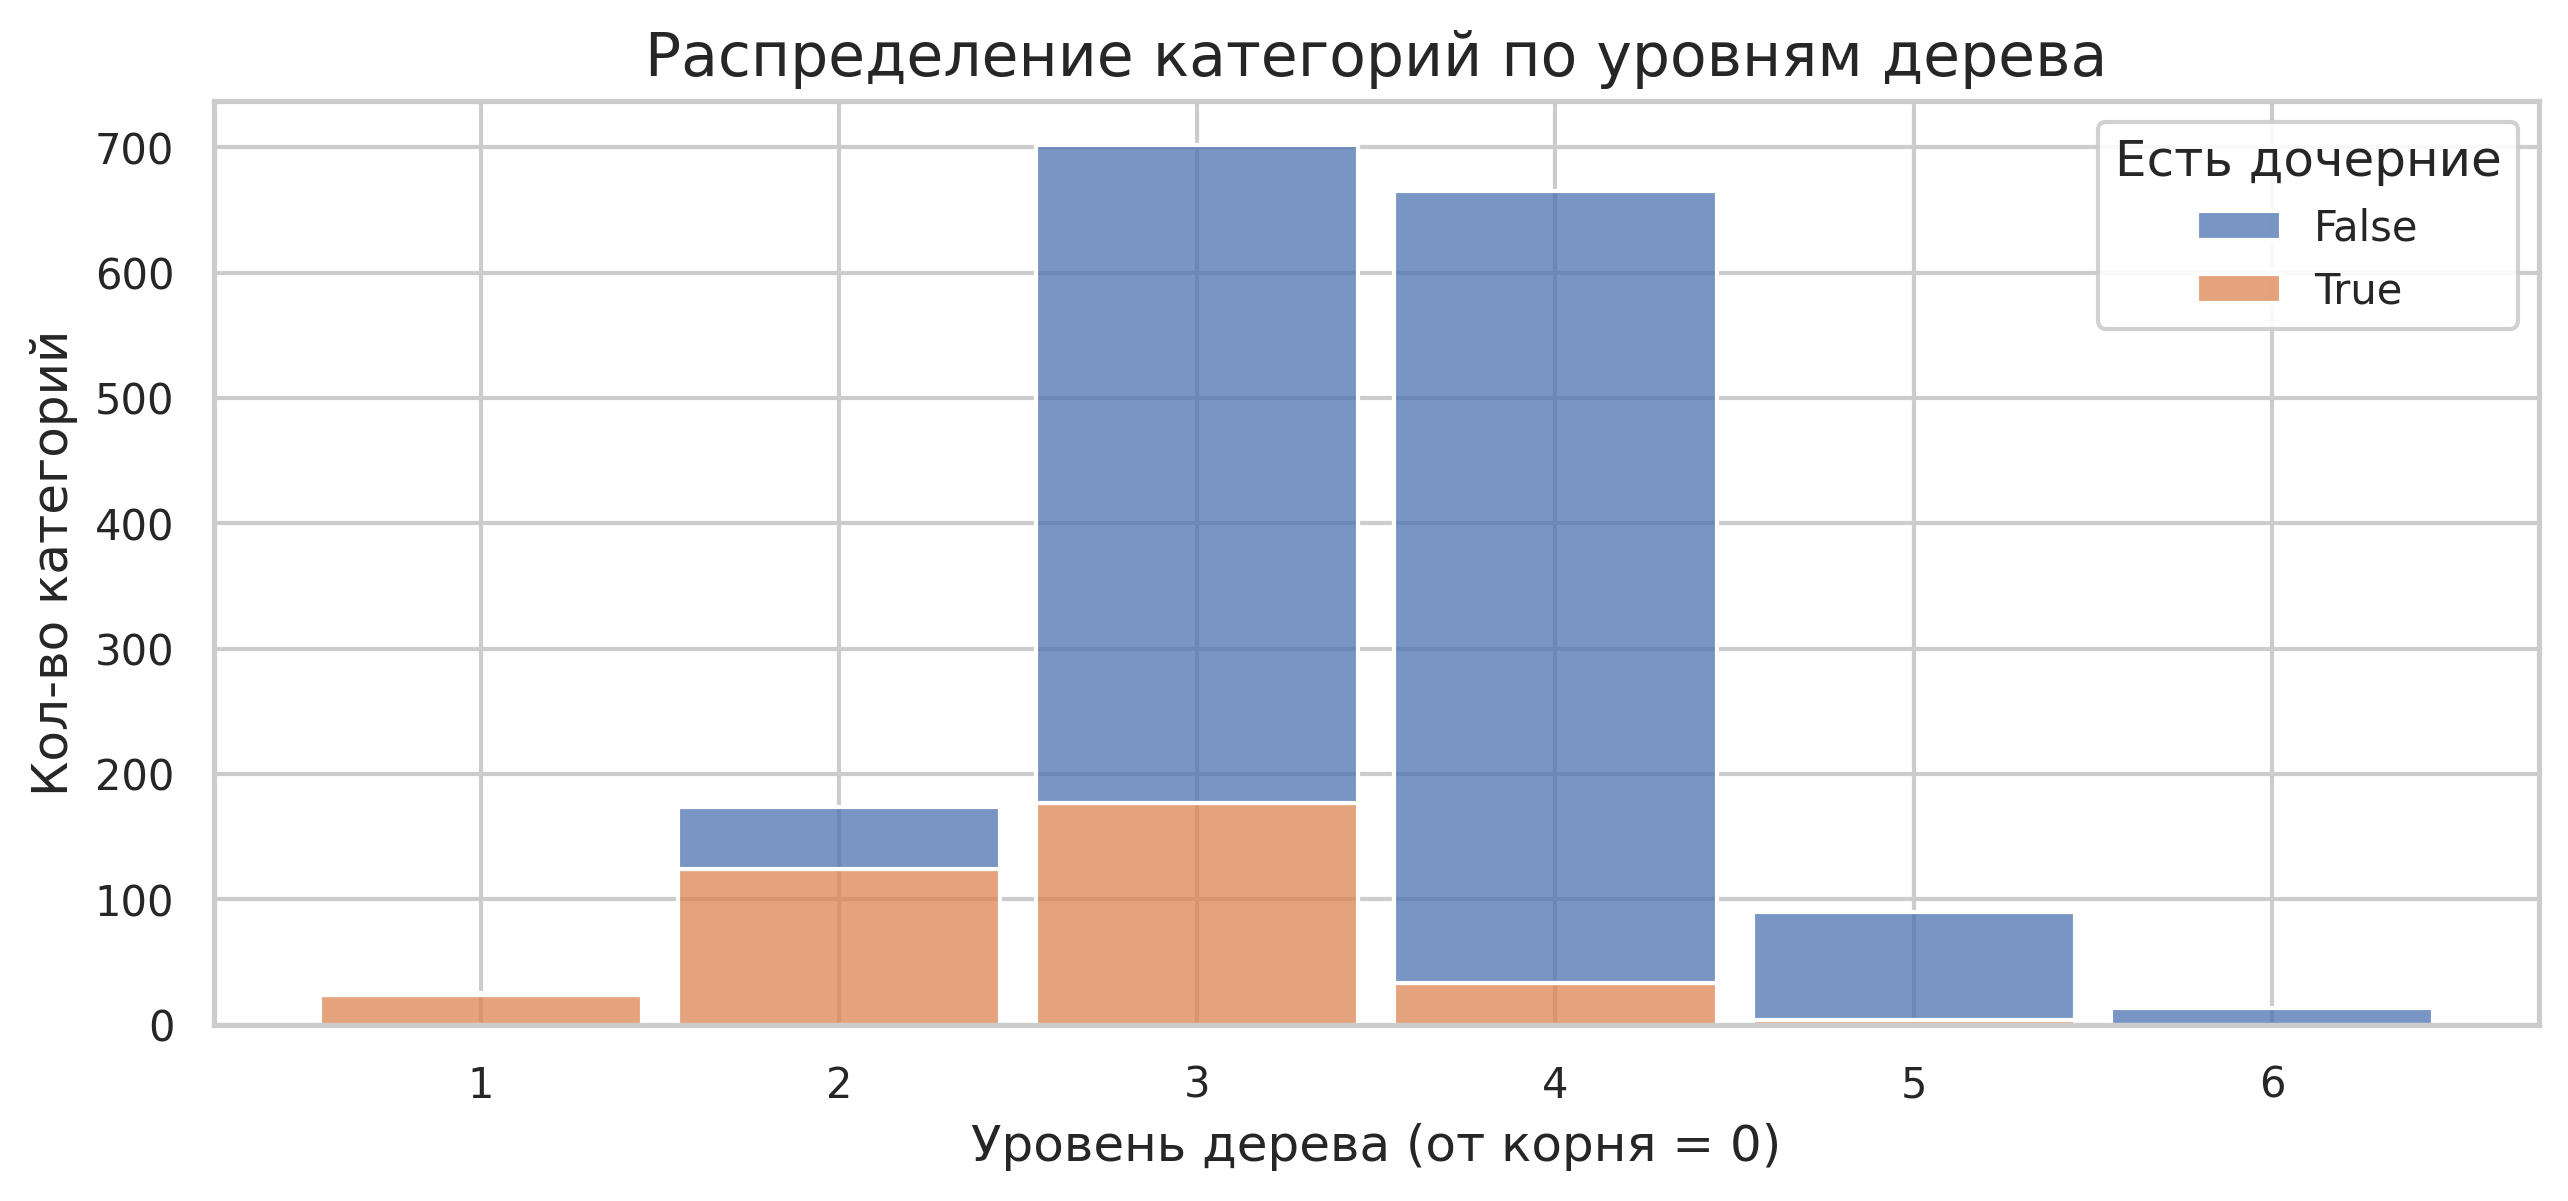

In [13]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ —É—Ä–æ–≤–Ω—è–º
plt.rcParams['figure.figsize'] = (10,4)
ax = sns.histplot(
    category_tree,
    x='cat_level',
    hue='has_subcat',
    multiple='stack',
    discrete=True, 
    shrink=.9
)
ax.get_legend().set_title('–ï—Å—Ç—å –¥–æ—á–µ—Ä–Ω–∏–µ')
ax.set_xlabel('–£—Ä–æ–≤–µ–Ω—å –¥–µ—Ä–µ–≤–∞ (–æ—Ç –∫–æ—Ä–Ω—è = 0)')
ax.set_ylabel('–ö–æ–ª-–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π')
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ —É—Ä–æ–≤–Ω—è–º –¥–µ—Ä–µ–≤–∞');

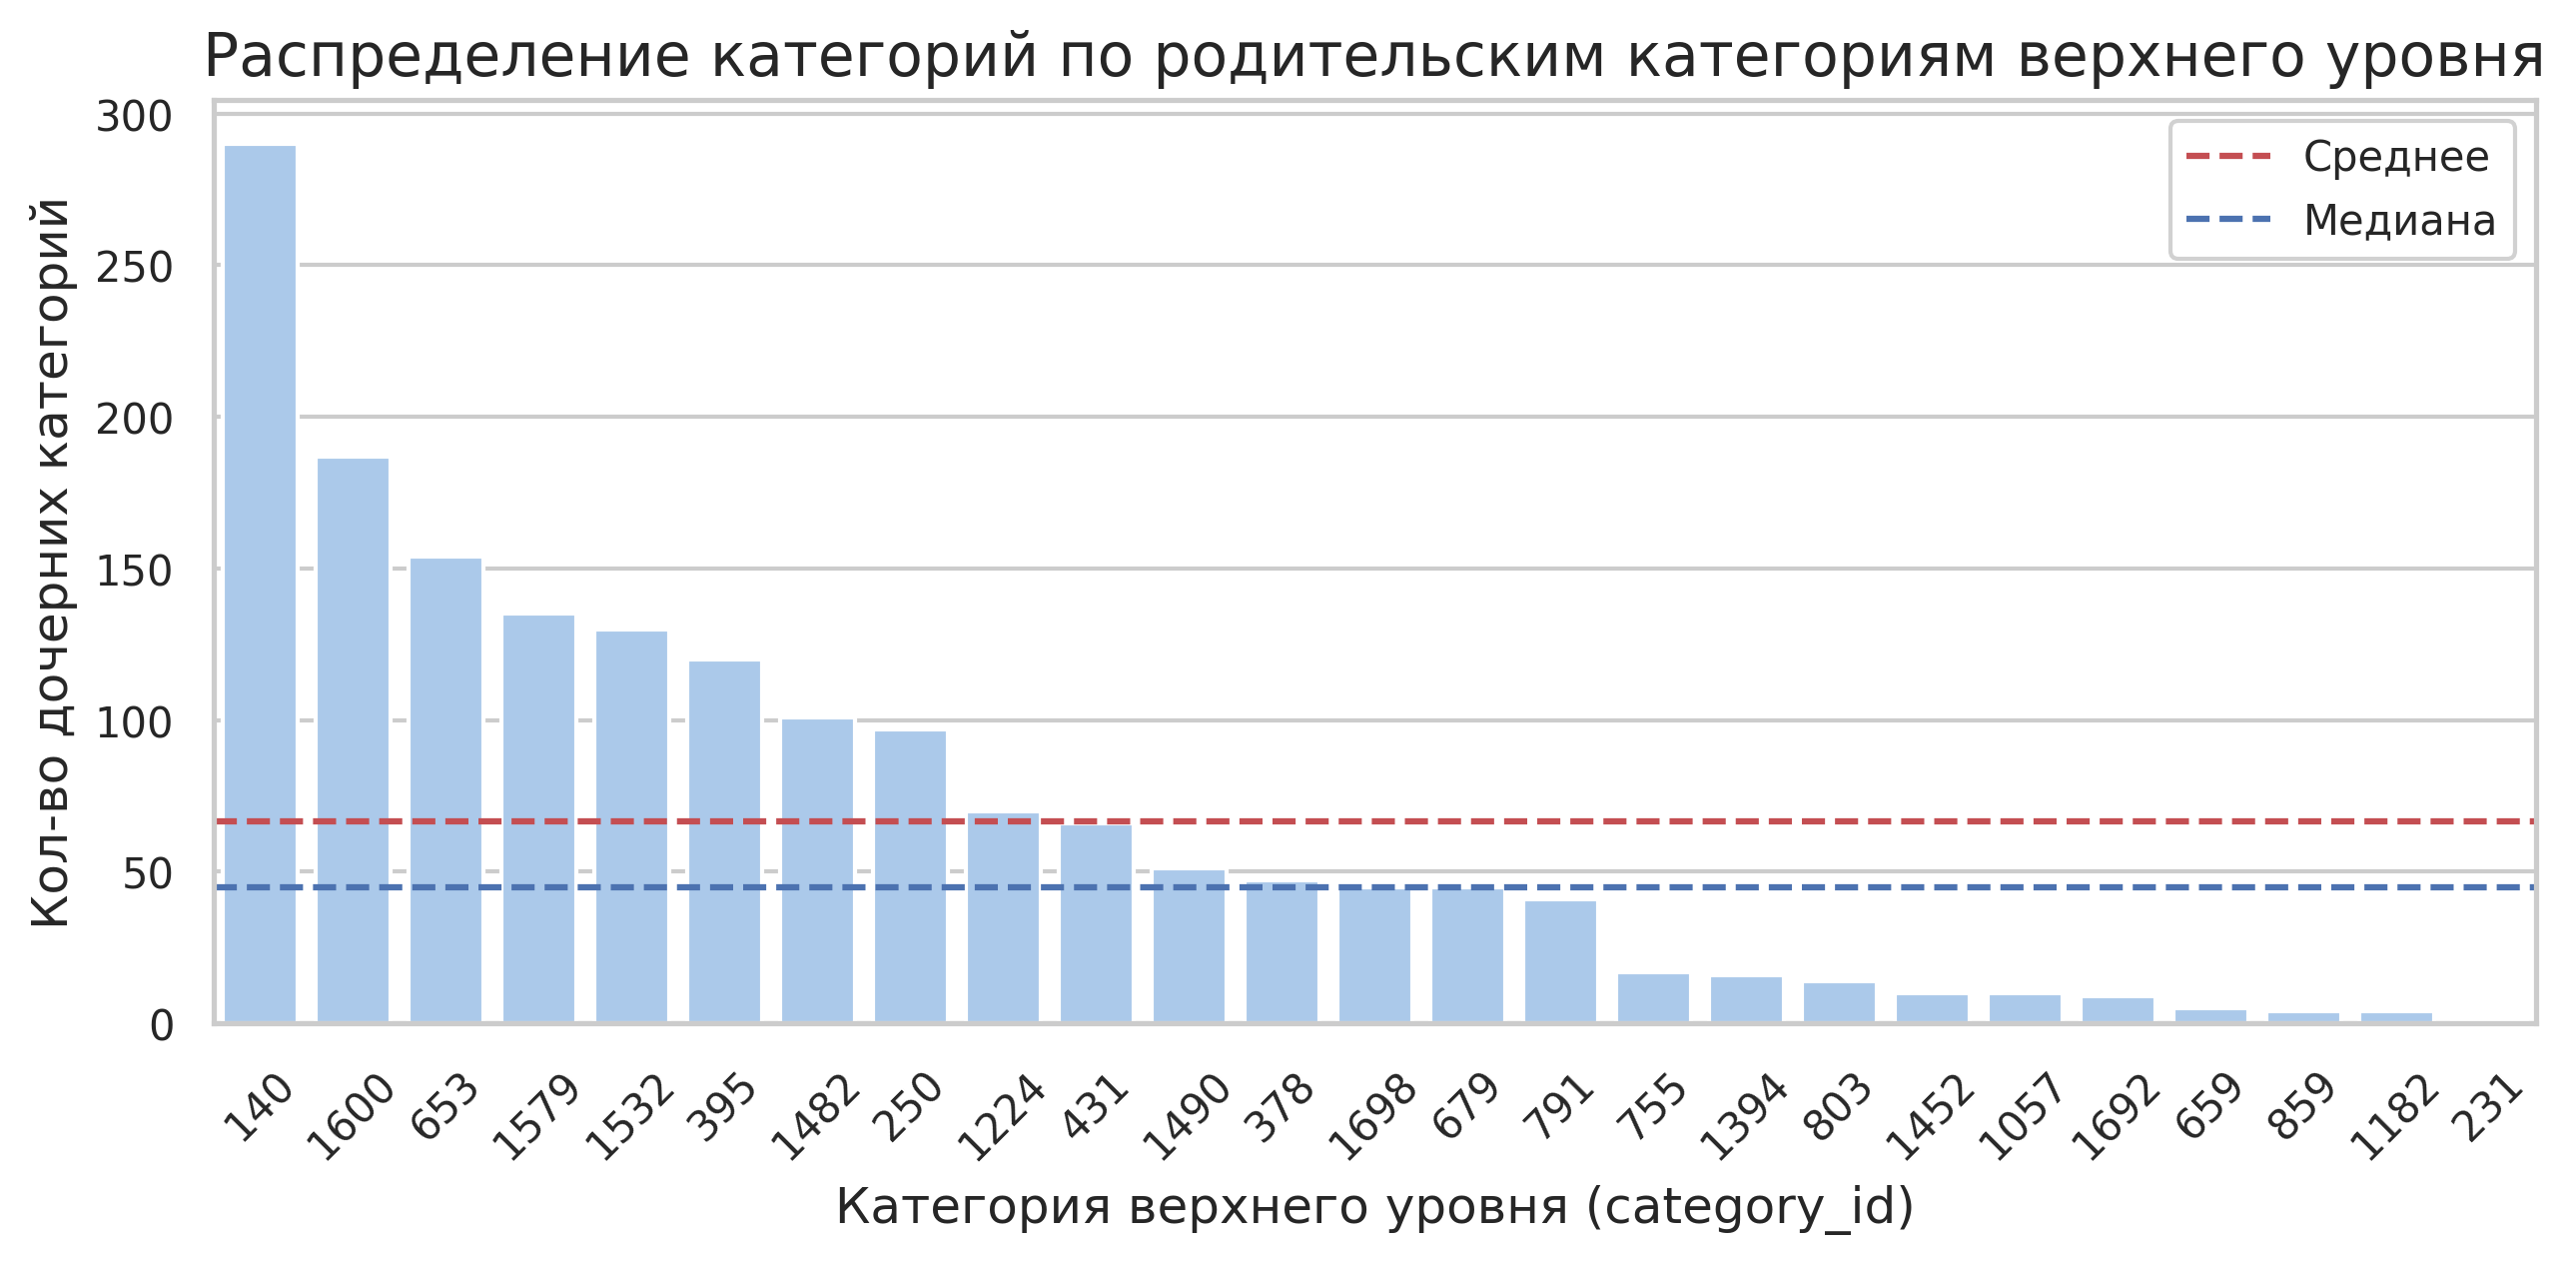

In [14]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è
ax = sns.barplot(
    category_tree['top_cat_id'].value_counts().reset_index()
    .astype(dtype={'top_cat_id': 'str'}),
    x='top_cat_id',
    y='count',
    color=sns.color_palette('pastel')[0]
)
ax.axhline(y=category_tree['top_cat_id'].value_counts().mean(),
           color='r', linestyle='--', label='–°—Ä–µ–¥–Ω–µ–µ')
ax.axhline(y=category_tree['top_cat_id'].value_counts().median(),
           color='b', linestyle='--', label='–ú–µ–¥–∏–∞–Ω–∞')
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è (category_id)')
ax.set_ylabel('–ö–æ–ª-–≤–æ –¥–æ—á–µ—Ä–Ω–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π')
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è');
plt.legend();

__–í—ã–≤–æ–¥—ã –ø–æ –¥–µ—Ä–µ–≤—É –∫–∞—Ç–µ–≥–æ—Ä–∏–π__:
 - –î–µ—Ä–µ–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ç–æ–≤–∞—Ä–æ–≤ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 1669 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ 25 –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–µ—Ä—Ö–Ω–µ–≥–æ (–ø–µ—Ä–≤–æ–≥–æ) —É—Ä–æ–≤–Ω—è. –í —Å—Ä–µ–¥–Ω–µ–º, –∫–∞–∂–¥–∞—è –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è —Å–æ–¥–µ—Ä–∂–∏—Ç –æ–∫–æ–ª–æ ~50 –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–π.
 - –ù–∞–∑–≤–∞–Ω–∏—è (–æ–ø–∏—Å–∞–Ω–∏—è) –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, —Å–¥–µ–ª–∞—Ç—å –∫–∞–∫–∏–µ –ª–∏–±–æ –≤—ã–≤–æ–¥—ã –æ –ø—Ä–∏—Ä–æ–¥–µ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ (–±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞, –∫–Ω–∏–≥–∏, —Ñ–∏–ª—å–º—ã) –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤–æ–∑–º–æ–∂–Ω—ã–º.

### 3. –¢–æ–≤–∞—Ä—ã (item_properties_*.csv)

In [15]:
# –í–∏–∑—É–∞–ª—å–Ω—ã–π –æ—Å–º–æ—Ç—Ä
items.head(3)

timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566

In [16]:
# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º –∫–æ–ª–æ–Ω–∫—É itemid –∏–∑ —ç—Å—Ç–µ—Ç—Ç–∏—á–µ—Å–∫–∏—Ö —Å–æ–æ–±—Ä–∞–∂–µ–Ω–∏–π
items.rename(columns={'itemid': 'item_id'}, inplace=True)

In [17]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ –≤ –∫–∞—Ç–∞–ª–æ–≥–µ
print(f"Unique items: {items['item_id'].nunique()}")

Unique items: 417053


–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è —Å–≤–æ–π—Å—Ç–≤ (property) –µ—Å—Ç—å –≤ —Ç–∞–±–ª–∏—Ü–µ:

In [18]:
properties_unique = pd.Series(items['property'].unique())
properties_numeric = pd.to_numeric(properties_unique, errors='coerce')
properties_non_numeric = properties_unique[properties_numeric.isna()].tolist()

print(f'Properties total         : {len(properties_unique)}')
print(f'  of which numeric       : {properties_numeric.notna().sum()}')
print(f'Non-numeric properties   : {properties_non_numeric}')

Properties total         : 1104
  of which numeric       : 1102
Non-numeric properties   : ['categoryid', 'available']


–ò–º–µ–µ–º 1104 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π —Å–≤–æ–π—Å—Ç–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'property'. –ó–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –¥–≤—É—Ö —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π ('categoryid', 'available'), –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è 'property' —è–≤–ª—è—é—Ç—Å—è —á–∏—Å–ª–æ–≤—ã–º–∏.  

__NB!__ –ü–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ä–∞—Å—à–∏—Ñ—Ä–æ–≤–∫–∏ (–¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—è) —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 'property' —É –Ω–∞—Å –Ω–µ—Ç –∏, –∫ —Ç–æ–º—É –∂–µ, –∑–Ω–∞—á–µ–Ω–∏—è 'values' –¥–ª—è –Ω–∏—Ö —Ç–∞–∫–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –∑–∞–∫–æ–¥—Ä–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ - –∏–≥–Ω–æ—Ä–∏—Ä—É–µ–º (—É–¥–∞–ª–∏–º) —á–∏—Å–ª–æ–≤—ã–µ 'properties' –∏–∑ –∫–∞—Ç–∞–ª–æ–≥–∞ items.   

In [19]:
# –ò–∑ –≤—Å–µ—Ö –∑–Ω–∞—á–µ–Ω–∏–π 'properties' –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ 'categoryid' –∏ 'available'
items = (
    items[
        items['property'].isin(['categoryid', 'available'])
    ]
    # –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—É
    .sort_values(by=['item_id', 'timestamp'], ignore_index=True)
)

–ü—Ä–∏–≤–µ–¥–µ–º —Ç–∏–ø—ã —Å—Ç–æ–ª–±—Ü–æ–≤:
- 'timestamp' –∫ _datetime_
- 'value' –∫ _int_

In [20]:
# –ü—Ä–∏–≤–µ–¥–µ–º —Å—Ç–æ–ª–±–µ—Ü timestamp –∫ —Ç–∏–ø—É datetime
items['timestamp'] = pd.to_datetime(items['timestamp'], unit='ms')
items['value'] = items['value'].astype('int')

# –í–∏–∑—É–∞–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞
items.head(5)

timestamp  item_id    property  value
0 2015-05-10 03:00:00        0  categoryid    209
1 2015-05-17 03:00:00        0   available      0
2 2015-05-10 03:00:00        1   available      1
3 2015-05-10 03:00:00        1  categoryid   1114
4 2015-05-17 03:00:00        1   available      0

In [21]:
# –î–∏–∞–ø–∞–∑–æ–Ω –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫
items['timestamp'].describe().loc[['min', 'max']]

min    2015-05-10 03:00:00
max    2015-09-13 03:00:00
Name: timestamp, dtype: object

–í—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ (timestamp) –∑–∞–ø–∏—Å–µ–π –≤ —Ç–∞–±–ª–∏—Ü–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 2015-05-10 –¥–æ 2015-09-13

In [22]:
# –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Å–≤–æ–π—Å—Ç–≤–∞ 'avalable'
items[items['property'] == 'available']['value'].unique()

array([0, 1])

In [23]:
# –£–±–µ–¥–∏–º—Å—è –≤ —Ç–æ–º, —á—Ç–æ –≤—Å–µ —Ç–æ–≤–∞—Ä—ã –∏–º–µ—é—Ç —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∫ 'available'
(
    items.query("property == 'available'")['item_id'].nunique()
    == items['item_id'].nunique()
)

True

__NB__: –í—Å–µ —Ç–æ–≤–∞—Ä—ã –≤ –∫–∞—Ç–∞–ª–æ–≥–∏ –∏–º–µ—é—Ç —Å–≤–æ–π—Å—Ç–≤–æ (property) 'available', –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è 0 –∏–ª–∏ 1 - —Å—É–¥—è –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é, —Ä–µ—á—å –∏–¥—ë—Ç –æ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–∞. –ü—Ä–∏ —ç—Ç–æ–º, –∫–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã, –≤ —Ä–∞–∑–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏ —Å–≤–æ–π—Å—Ç–≤–æ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è - —ç—Ç–æ, —Å –±–æ–ª—å—à–æ–π –¥–æ–ª–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, –æ—Ç—Ä–∞–∂–∞–µ—Ç –∏—Å—Ç–æ—Ä–∏—é –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–∞ –∫ –ø–æ–∫—É–ø–∫–µ –≤ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏. 

In [24]:
# –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Å–æ–∑–¥–∞–¥–∏–º –æ—Ç–¥–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É items_cats, —Å–æ–¥–µ—Ä–∂–∞—â—É—é —Ç–æ–ª—å–∫–æ
# —Å–≤–æ–π—Å—Ç–≤–æ categoryid
items_cats = (
    items
    .query("property == 'categoryid'")
    .drop(columns='property')
    .rename(columns={'value': 'category_id'})
    .sort_values(by=['item_id', 'timestamp'], ignore_index=True)
)

# –í–∏–∑—É–∞–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞
items_cats.head(3)

timestamp  item_id  category_id
0 2015-05-10 03:00:00        0          209
1 2015-05-10 03:00:00        1         1114
2 2015-05-10 03:00:00        2         1305

In [25]:
# –£–±–µ–¥–∏–º—Å—è –≤ —Ç–æ–º, —á—Ç–æ –≤—Å–µ —Ç–æ–≤–∞—Ä—ã –∏–º–µ—é—Ç –ø—Ä–∏–∑–Ω–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
items_cats['item_id'].nunique() == items['item_id'].nunique()

True

In [26]:
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —É —Ç–æ–≤–∞—Ä–æ–≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö/–¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
items_cats[items_cats['item_id'].duplicated(keep=False)].iloc[-6:-2]

timestamp  item_id  category_id
788174 2015-08-09 03:00:00   466829         1277
788175 2015-08-16 03:00:00   466829         1277
788176 2015-08-23 03:00:00   466829          438
788177 2015-08-30 03:00:00   466829          438

__NB__ –í—Å–µ —Ç–æ–≤–∞—Ä—ã –≤ —Ç–∞–±–ª–∏—Ü–µ –∏–º–µ—é—Ç –ø—Ä–∏–∑–Ω–∫ (categoryid) –æ—Ç–Ω–µ—Å–µ–Ω–∏—è –∫ –∫–∞–∫–æ–π-–ª–∏–±–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫—É –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏, –ø—Ä–∏–∑–Ω–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (categoryid) –º–æ–∂–µ—Ç –∏–∑–º–µ–Ω—è–µ—Ç—å—Å—è —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏ __[!] –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: –ø—Ä–∏–º–µ–º, —á—Ç–æ —Ç–æ–≤–∞—Ä –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –æ–¥–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, —Å —Å–∞–º–æ–π –ø–æ—Å–ª–µ–¥–Ω–µ–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –º–µ—Ç–∫–æ–π (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞—Å—á–µ—Ç–∞)__. 

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–æ–≤ –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–∞–π–¥–µ–Ω—ã –≤ –¥–µ—Ä–µ–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π

In [27]:
# –ö–∞—Ç–µ–≥–æ—Ä–∏–∏, –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –≤ –∫–∞—Ç–∞–ª–æ–≥–µ, –Ω–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –≤ –¥–µ—Ä–µ–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
weird_cats = (
    set(items_cats['category_id'].drop_duplicates()) 
    - set(category_tree['category_id'])
)

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–ª–µ—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π (–∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ –¥–µ—Ä–µ–≤–µ)
print(f'Weird categories: {len(weird_cats)}')

# –ö–æ–ª-–≤–æ —Ç–æ–≤–∞—Ä–æ–≤, –æ—Ç–Ω–æ—Å–∏–º—ã—Ö –∫ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
print(
    'Items associated with weird categories:', 
    items_cats[items_cats['category_id'].isin(weird_cats)]['item_id'].nunique()
)

Weird categories: 30
Items associated with weird categories: 137


–í –∫–∞—Ç–µ–ª–æ–≥–µ —Ç–æ–≤–∞—Ä–æ–≤ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç 30 '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö' –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –¥–µ—Ä–µ–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π (—Ç–∞–±–∏—Ü–∞ category_tree). –° —ç—Ç–∏–º–∏ '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏' –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ —Å–≤—è–∑–∞–Ω–æ 137 —Ç–æ–≤–∞—Ä–æ–≤. –ë—É–¥–µ–º –Ω–∞–¥–µ—è—Ç—å—Å—è, —á—Ç–æ —Å –¥–∞–Ω–Ω—ã–º–∏ —Ç–æ–≤–∞—Ä–∞–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –Ω–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É—é—Ç üòâ 

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–≤–∞—Ä–æ–≤ –ø–æ —Ç–æ–ø-–∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è.   
–í –∫–∞—á–µ—Å—Ç–≤–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ç–æ—á–∫–∏ –≤–æ–∑—å–º–µ–º —Å–∞–º—É—é –ø–æ–∑–¥–Ω—é—é –∏–∑–≤–µ—Å—Ç–Ω—É—é –¥–∞—Ç—É (2015-09-13).

In [28]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –æ—Ç–¥–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É items_graph –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞

# –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º, –æ—Å—Ç–∞—Ç–≤–∏–≤ —Ç–æ–ª—å–∫–æ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è 
# –ø–æ –≤—Ä–µ–º–µ–Ω–∏ 
items_graph = (
    items_cats
    .sort_values(by=['item_id', 'timestamp'], ignore_index=True)
    .groupby('item_id')
    .tail(1)
)

# –î–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–∞ - 'available' (–ø–æ—Å–ª–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è)
items_graph = items_graph.merge(
    items
    .query("property == 'available'")
    .sort_values(by=['item_id', 'timestamp'], ignore_index=True)
    .groupby('item_id')
    .tail(1)
    [['item_id', 'value']]
    .rename(columns={'value': 'available'}),
    on='item_id',
    how='left'
)

# –î–æ–±–∞–≤–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏—é –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è
items_graph = items_graph.merge(
    category_tree[['category_id', 'top_cat_id']],
    on='category_id',
    how='left'
)

# –£–±–µ—Ä–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ top_cat_id (–∏–∑ –∑–∞ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–≤—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π) –∏ –ø—Ä–∏–≤–µ–¥–µ–º —Ç–∏–ø—ã
items_graph = (
    items_graph
    .dropna()
    .astype(dtype={'top_cat_id': 'int', 'available': 'bool'})
)

# –û–±—â–∞–∞—è –¥–æ–ª—è –¥–æ—Å—Ç—É–ø–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤
items_graph['available'].value_counts()

available
False    362911
True      54010
Name: count, dtype: int64

–ò–∑ –±–æ–ª–µ–µ 400 —Ç—ã—Å. —Ç–æ–≤–∞—Ä–æ–≤ –Ω–∞ –∫–æ–Ω–µ—Ü –∏–∑–≤–µ—Å—Ç–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ (2015-09-13) –¥–æ—Å—Ç—É–ø–Ω–æ –∫ –ø–æ–∫—É–ø–∫–µ –æ–∫–æ–ª–æ 54 —Ç—ã—Å. (13%)

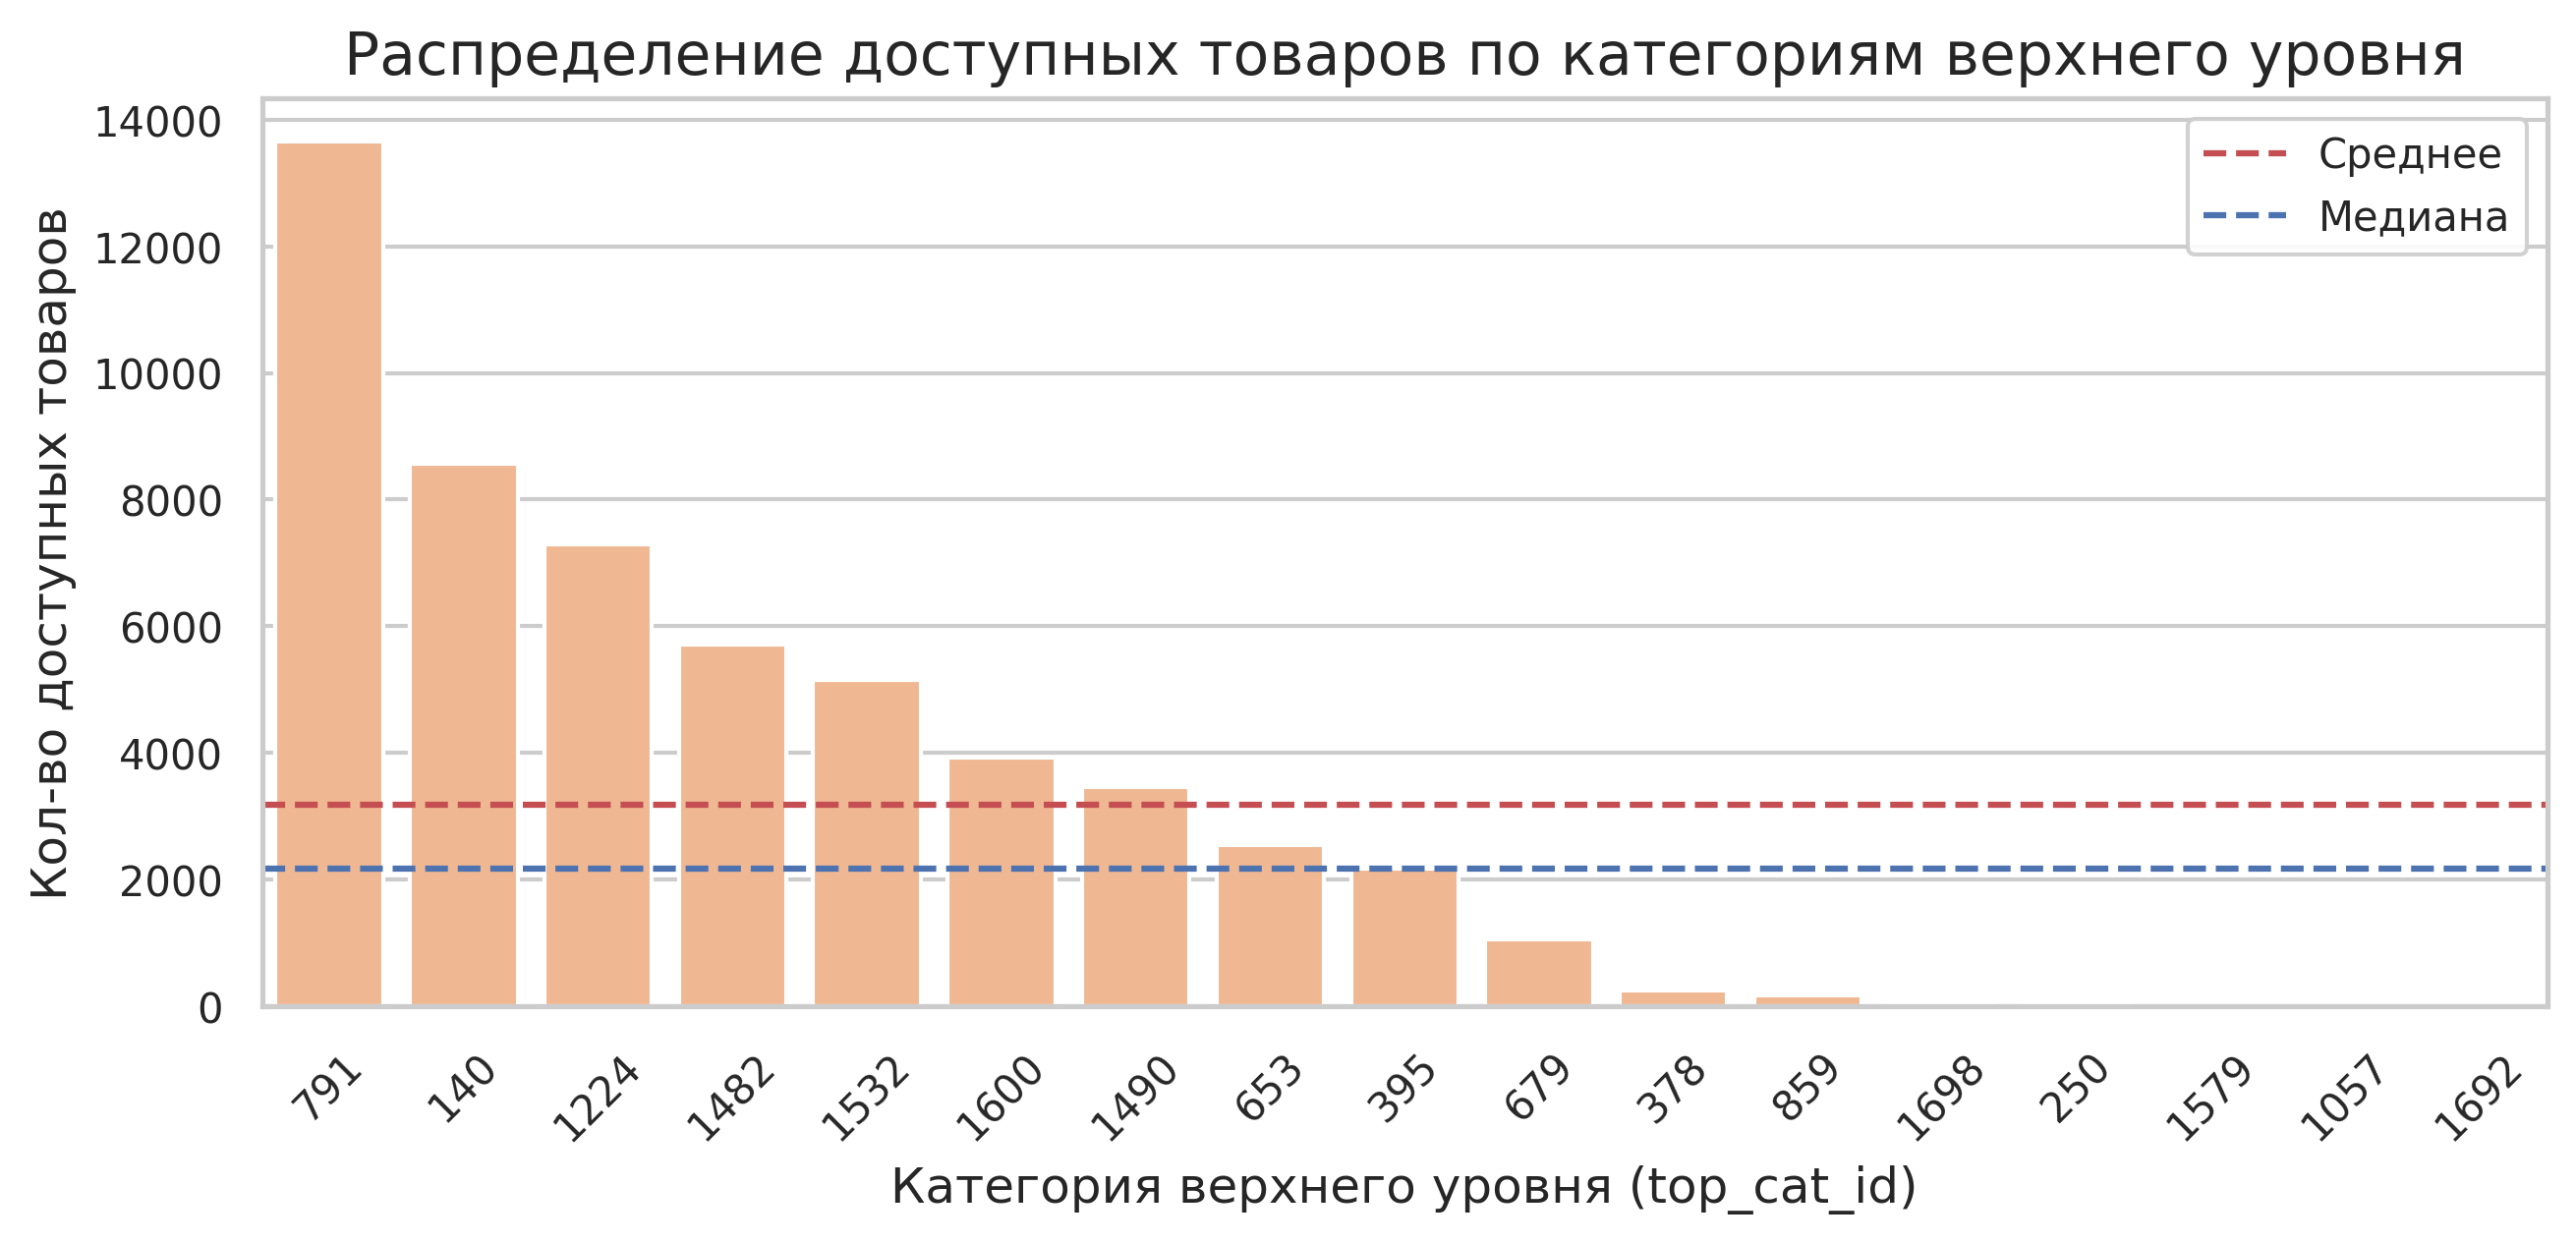

In [29]:
ax = sns.barplot(
    items_graph.query('available == True')
    ['top_cat_id']
    .value_counts()
    .reset_index()
    .astype(dtype={'top_cat_id': 'str'}),
    x='top_cat_id',
    y='count',
    color=sns.color_palette('pastel')[1]
)
ax.axhline(y=items_graph.query('available == True')['top_cat_id']
           .value_counts().mean(), color='r', linestyle='--', label='–°—Ä–µ–¥–Ω–µ–µ')
ax.axhline(y=items_graph.query('available == True')['top_cat_id']
           .value_counts().median(), color='b', linestyle='--', label='–ú–µ–¥–∏–∞–Ω–∞')
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è (top_cat_id)')
ax.set_ylabel('–ö–æ–ª-–≤–æ –¥–æ—Å—Ç—É–ø–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤')
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ—Å—Ç—É–ø–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è');
plt.legend();

__–í—ã–≤–æ–¥—ã –ø–æ –∫–∞—Ç–∞–ª–æ–≥—É —Ç–æ–≤–∞—Ä–æ–≤__:
- –ö–∞—Ç–∞–ª–æ–≥ —Å–æ–¥–µ—Ä–∂–∏—Ç 417 —Ç—ã—Å. —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤  

- –ò–º–µ–µ–º 1104 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π —Å–≤–æ–π—Å—Ç–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'property'. –ó–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –¥–≤—É—Ö —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π ('categoryid', 'available'), –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è 'property' —è–≤–ª—è—é—Ç—Å—è —á–∏—Å–ª–æ–≤—ã–º–∏. –î–∞–Ω–Ω—ã—Ö –¥–ª—è —Ä–∞—Å—à–∏—Ñ—Ä–æ–≤–∫–∏ (–¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—è) —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 'property' —É –Ω–∞—Å –Ω–µ—Ç –∏, –∫ —Ç–æ–º—É –∂–µ, –∑–Ω–∞—á–µ–Ω–∏—è 'values' –¥–ª—è –Ω–∏—Ö —Ç–∞–∫–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –∑–∞–∫–æ–¥—Ä–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ - –∏–≥–Ω–æ—Ä–∏—Ä—É–µ–º (—É–¥–∞–ª–∏–º) —á–∏—Å–ª–æ–≤—ã–µ 'properties' –∏–∑ –∫–∞—Ç–∞–ª–æ–≥–∞ items.   

- –í—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ (timestamp) –∑–∞–ø–∏—Å–µ–π –≤ —Ç–∞–±–ª–∏—Ü–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 2015-05-10 –¥–æ 2015-09-13  

- –í—Å–µ —Ç–æ–≤–∞—Ä—ã –≤ –∫–∞—Ç–∞–ª–æ–≥–∏ –∏–º–µ—é—Ç —Å–≤–æ–π—Å—Ç–≤–æ (property) 'available', –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è 0 –∏–ª–∏ 1 - —Å—É–¥—è –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é, —Ä–µ—á—å –∏–¥—ë—Ç –æ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–∞. –ü—Ä–∏ —ç—Ç–æ–º, –∫–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã, –≤ —Ä–∞–∑–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏ —Å–≤–æ–π—Å—Ç–≤–æ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è - —ç—Ç–æ, —Å –±–æ–ª—å—à–æ–π –¥–æ–ª–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, –æ—Ç—Ä–∞–∂–∞–µ—Ç –∏—Å—Ç–æ—Ä–∏—é –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–∞ –∫ –ø–æ–∫—É–ø–∫–µ –≤ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏.  

- –í—Å–µ —Ç–æ–≤–∞—Ä—ã –≤ —Ç–∞–±–ª–∏—Ü–µ –∏–º–µ—é—Ç –ø—Ä–∏–∑–Ω–∫ (categoryid) –æ—Ç–Ω–µ—Å–µ–Ω–∏—è –∫ –∫–∞–∫–æ–π-–ª–∏–±–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫—É –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏, –ø—Ä–∏–∑–Ω–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (categoryid) –º–æ–∂–µ—Ç –∏–∑–º–µ–Ω—è–µ—Ç—å—Å—è —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏ __[!] –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: –ø—Ä–∏–º–µ–º, —á—Ç–æ —Ç–æ–≤–∞—Ä –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –æ–¥–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, —Å —Å–∞–º–æ–π –ø–æ—Å–ª–µ–¥–Ω–µ–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –º–µ—Ç–∫–æ–π (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞—Å—á–µ—Ç–∞)__.   

- –í –∫–∞—Ç–µ–ª–æ–≥–µ —Ç–æ–≤–∞—Ä–æ–≤ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç 30 '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö' –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –¥–µ—Ä–µ–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π (—Ç–∞–±–∏—Ü–∞ category_tree). –° —ç—Ç–∏–º–∏ '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏' –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ —Å–≤—è–∑–∞–Ω–æ 137 —Ç–æ–≤–∞—Ä–æ–≤. –ë—É–¥–µ–º –Ω–∞–¥–µ—è—Ç—å—Å—è, —á—Ç–æ —Å –¥–∞–Ω–Ω—ã–º–∏ —Ç–æ–≤–∞—Ä–∞–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –Ω–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É—é—Ç üòâ 

- –ò–∑ –±–æ–ª–µ–µ 400 —Ç—ã—Å. —Ç–æ–≤–∞—Ä–æ–≤ –Ω–∞ –∫–æ–Ω–µ—Ü –∏–∑–≤–µ—Å—Ç–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ (2015-09-13) –¥–æ—Å—Ç—É–ø–Ω–æ –∫ –ø–æ–∫—É–ø–∫–µ –æ–∫–æ–ª–æ 54 —Ç—ã—Å. (13%)

### 4. –°–æ–±—ã—Ç–∏—è (events.csv)

In [30]:
# –í–∏–∑—É–∞–ª—å–Ω—ã–π –æ—Å–º–æ—Ç—Ä
events.head(3)

timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN

In [31]:
# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º —Å—Ç–æ–ª–±—Ü—ã –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ 
events.rename(
    columns={
        'visitorid': 'user_id',
        'itemid': 'item_id',
        'transactionid': 'transaction_id'
    }, 
    inplace=True
)

# –ü—Ä–∏–≤–µ–¥–µ–º timestamp –∫ —Ç–∏–ø—É datetime
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')

# –í–∏–∑—É–∞–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞
events.head(3)

timestamp  user_id event  item_id  transaction_id
0 2015-06-02 05:02:12.117   257597  view   355908             NaN
1 2015-06-02 05:50:14.164   992329  view   248676             NaN
2 2015-06-02 05:13:19.827   111016  view   318965             NaN

In [32]:
events.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   timestamp       datetime64[ns]
 1   user_id         int64         
 2   event           object        
 3   item_id         int64         
 4   transaction_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 244.9 MB


In [33]:
events['timestamp'].describe().loc[['min', 'max']]

min    2015-05-03 03:00:04.384000
max    2015-09-18 02:59:47.788000
Name: timestamp, dtype: object

–¢–∞–±–ª–∏—Ü–∞ —Å–æ–±—ã—Ç–∏–π —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ 2.7 –º–ª–Ω. –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ —Ç–æ–≤–∞—Ä–æ–≤ –≤ –ø–µ—Ä–∏–æ–¥ —Å 2015-05-03 –ø–æ 2015-09-18

In [34]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–æ–±—ã—Ç–∏–π –ø–æ —Ç–∏–ø–∞–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
events['event'].value_counts() # (normalize=True)

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

97% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Å–æ–±—ã—Ç–∏–π —ç—Ç–æ –ø—Ä–æ—Å–º–æ—Ç—Ä —Ç–æ–≤–∞—Ä–∞, 70 —Ç—ã—Å.(3%) - –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É, 22 —Ç—ã—Å.(1%) - –ø–æ–∫—É–ø–∫–∞.

In [35]:
# –ß–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
print(f'Unique users: {events["user_id"].nunique()}')

# –£–Ω–∏–∏–∫–∞–ª—å–Ω—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø–æ —Ç–∏–ø–∞–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π
events.groupby('event')['user_id'].nunique()

Unique users: 1407580


event
addtocart        37722
transaction      11719
view           1404179
Name: user_id, dtype: int64

–í—Å–µ–≥–æ —Å —Å–µ—Ä–≤–∏—Å–æ–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞–ª–æ 1.4 –º–ª–Ω. —É–Ω–∏–∞–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –ø—Ä–∏ —ç—Ç–æ–º –¥–æ–±–∞–≤–ª—è–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É —Ç–æ–ª—å–∫–æ 37 —Ç—ã—Å. (3%), –∞ —Å–æ–≤–µ—Ä—à–∏–ª–∏ –ø–æ–∫—É–ø–∫—É 12 —Ç—ã—Å. (1%)

In [36]:
# –ß–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤
events['item_id'].nunique()

# –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã –ø–æ —Ç–∏–ø–∞–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å–≤–∏–π
events.groupby('event')['item_id'].nunique()

event
addtocart       23903
transaction     12025
view           234838
Name: item_id, dtype: int64

–í—Å–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–ª–∏ 239 —Ç—ã—Å. —É–Ω–∏–∞–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤, –ø—Ä–∏ —ç—Ç–æ–º –¥–æ–±–∞–≤–∏–ª–∏ –≤ –∫–æ—Ä–∏–∑–∏–Ω—É 23 —Ç—ã—Å. —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ (~10% –æ—Ç –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö), –∞ –∫—É–ø–∏–ª–∏ 12 —Ç—ã—Å. (~5% –æ—Ç –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö).

In [37]:
# –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—É –ø–æ –≤—Ä–µ–º–µ–Ω–∏ 
events.sort_values(by='timestamp', inplace=True, ignore_index=True)

# –î–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É —Å—Ç–æ–ª–±–µ—Ü —Å –¥–∞—Ç–æ–π
events['date'] = events['timestamp'].dt.date

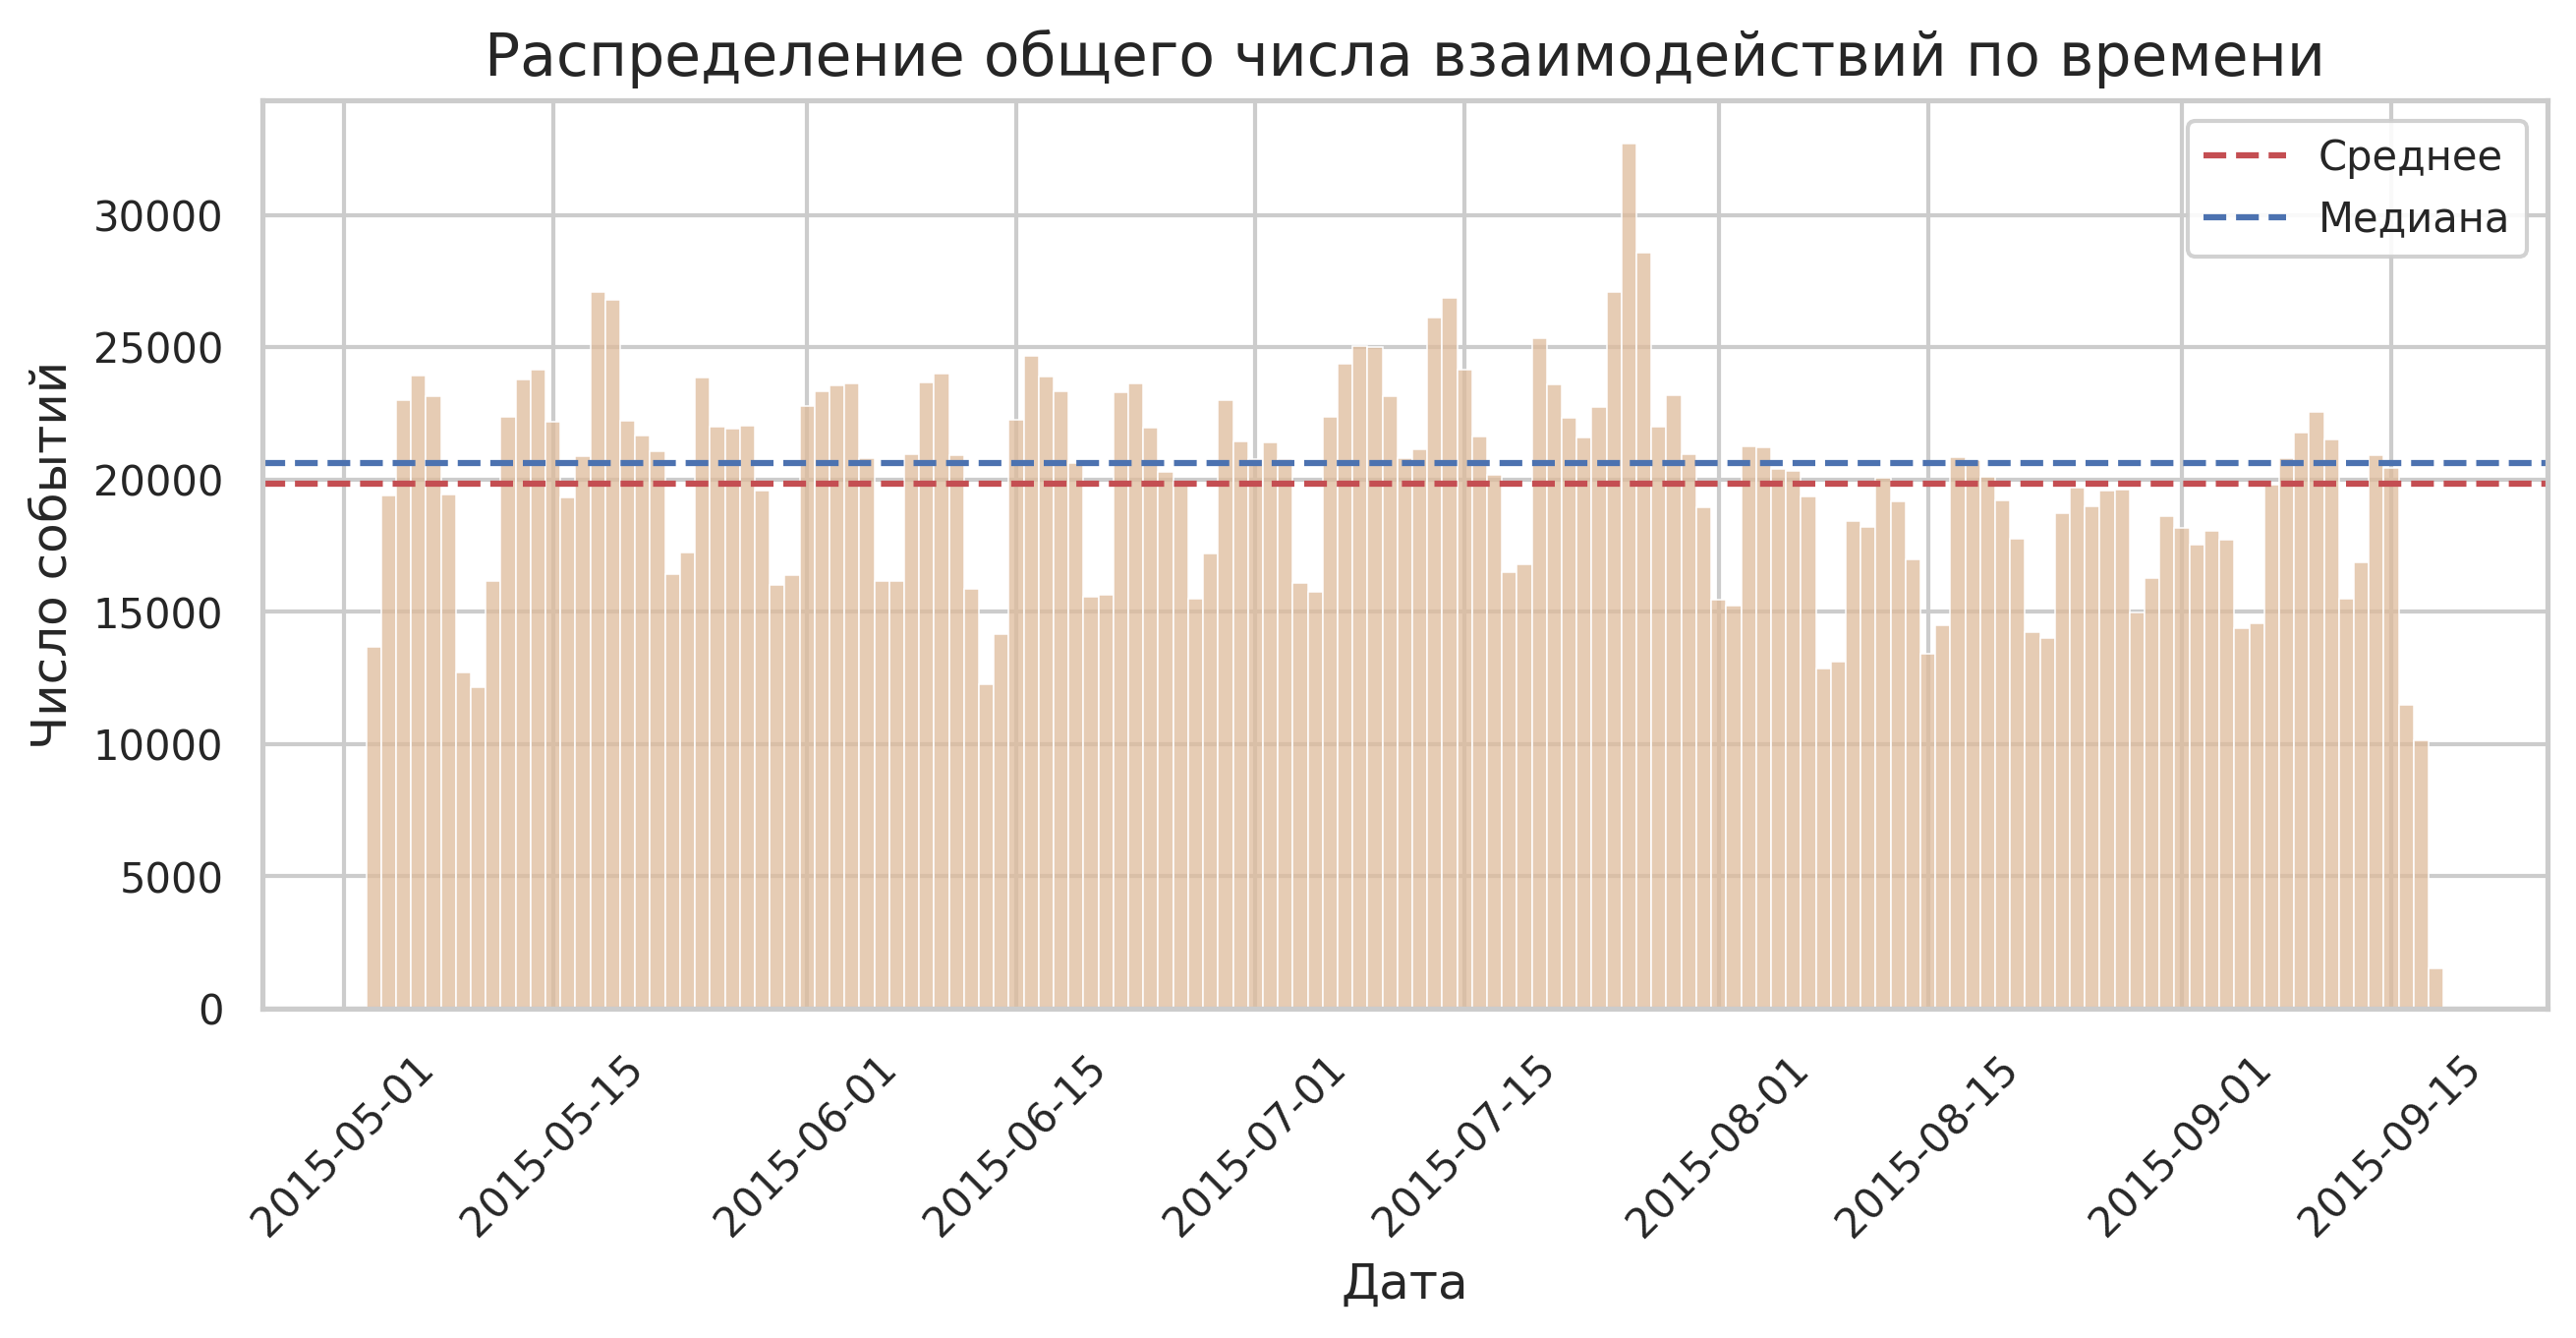

In [38]:
# –ò–∑–º–µ–Ω–µ–Ω–∏–µ —á–∏—Å–ª–∞ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π –ø–æ –≤—Ä–µ–º–µ–Ω–∏
ax = sns.histplot(
    events[['date']], 
    x='date',
    color=sns.color_palette('pastel')[5]
)

ax.axhline(y=events.groupby('date')['timestamp'].count().mean(),
           color='r', linestyle='--', label='–°—Ä–µ–¥–Ω–µ–µ')
ax.axhline(y=events.groupby('date')['timestamp'].count().median(),
           color='b', linestyle='--', label='–ú–µ–¥–∏–∞–Ω–∞')
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('–î–∞—Ç–∞')
ax.set_ylabel('–ß–∏—Å–ª–æ —Å–æ–±—ã—Ç–∏–π')
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π –ø–æ –≤—Ä–µ–º–µ–Ω–∏')
plt.legend();

–ü–æ—Ç–æ–∫ —Å–æ–±—ã—Ç–∏–π (–≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π) –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å —Ç–æ–≤–∞—Ä–∞–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω —Å –º–∞—è –ø–æ —Å–µ–Ω—Ç—è–±—Ä—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ, –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É—é—Ç (–≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø–æ—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç) —Ç–æ–≤–∞—Ä—ã –æ–∫–æ–ª–æ 20 —Ç—ã—Å. —Ä–∞–∑ –≤ –¥–µ–Ω—å. 

In [39]:
# C—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —á–∏—Å–ª–∞ –∑–Ω–∞—á–∏–º—ã—Ö —Å–æ–±—ã—Ç–∏–π –≤ –¥–µ–Ω—å
print('–ß–∏—Å–ª–æ —é–æ–±–∞–≤–ª–µ–Ω–∏–π –≤ –∫–æ—Ä–∑–∏–Ω—É –≤ –¥–µ–Ω—å:')
display(events.query("event == 'addtocart'").groupby('date')
        ['timestamp'].count().describe().loc[['mean', '50%']])

print('–ß–∏—Å–ª–æ –ø–æ–∫—É–ø–æ–∫ –≤ –¥–µ–Ω—å:')
display(events.query("event == 'transaction'").groupby('date')
        ['timestamp'].count().describe().loc[['mean', '50%']])

–ß–∏—Å–ª–æ —é–æ–±–∞–≤–ª–µ–Ω–∏–π –≤ –∫–æ—Ä–∑–∏–Ω—É –≤ –¥–µ–Ω—å:


mean   498.79
50%    514.00
Name: timestamp, dtype: float64

–ß–∏—Å–ª–æ –ø–æ–∫—É–ø–æ–∫ –≤ –¥–µ–Ω—å:


mean   161.56
50%    162.00
Name: timestamp, dtype: float64

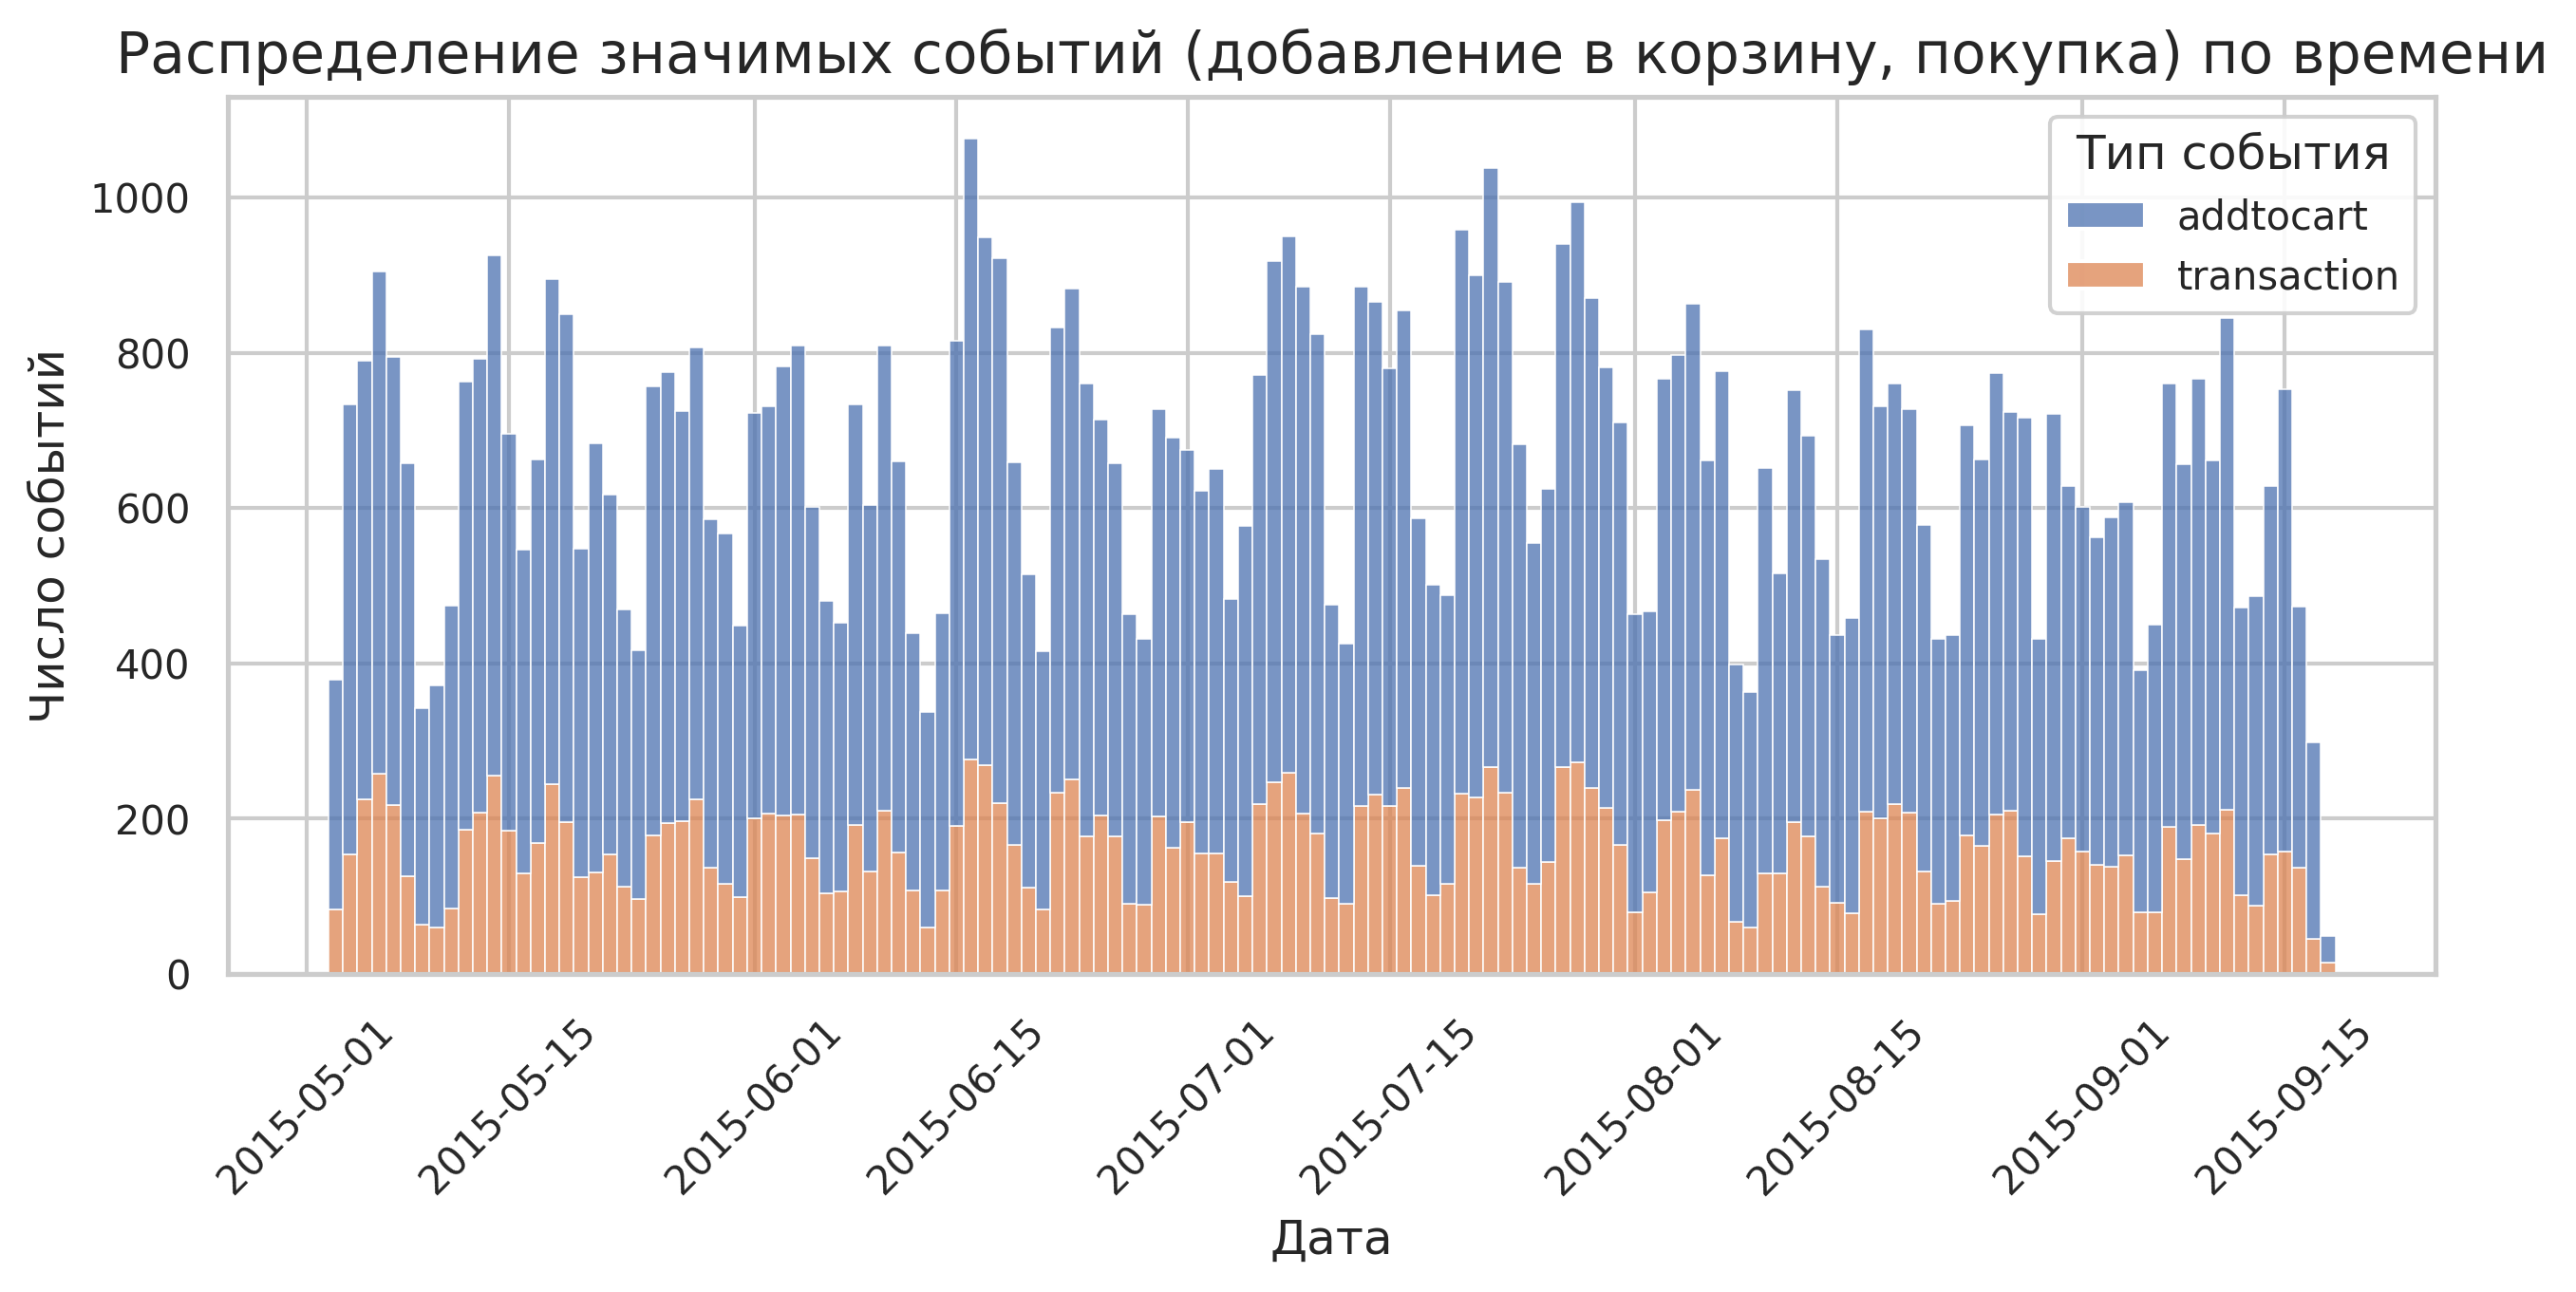

In [40]:
# –ò–∑–º–µ–Ω–µ–Ω–∏–µ —á–∏—Å–ª–∞ –∑–Ω–∞—á–∏–º—ã—Ö —Å–æ–±—ã—Ç–∏–π –ø–æ –≤—Ä–µ–º–µ–Ω–∏
ax = sns.histplot(
    events.query("event != 'view'")[['date', 'event']], 
    x='date',
    # color=sns.color_palette('pastel')[0],
    hue='event',
    multiple='stack'
)
ax.get_legend().set_title('–¢–∏–ø —Å–æ–±—ã—Ç–∏—è')
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('–î–∞—Ç–∞')
ax.set_ylabel('–ß–∏—Å–ª–æ —Å–æ–±—ã—Ç–∏–π')
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–∏–º—ã—Ö —Å–æ–±—ã—Ç–∏–π (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É, –ø–æ–∫—É–ø–∫–∞) –ø–æ –≤—Ä–µ–º–µ–Ω–∏');

–ó–Ω–∞—á–∏–º—ã–µ —Å–æ–±—ã—Ç–∏—è (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É, –ø–æ–∫—É–ø–∫–∞) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏ —Ç–∞–∫–∂–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ (—Å —É—á–µ—Ç–æ–º –Ω–µ–¥–µ–ª—å–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏), –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –¥–æ–±–∞–≤–ª—è—é—Ç —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É –æ–∫–æ–ª–æ 500 —Ä–∞–∑ –≤ –¥–µ–Ω—å, —Å–æ–≤–µ—Ä—à–∞—é—Ç –ø–æ–∫—É–ø–∫—É –æ–∫–æ–ª–æ 160 —Ä–∞–∑ –≤ –¥–µ–Ω—å.

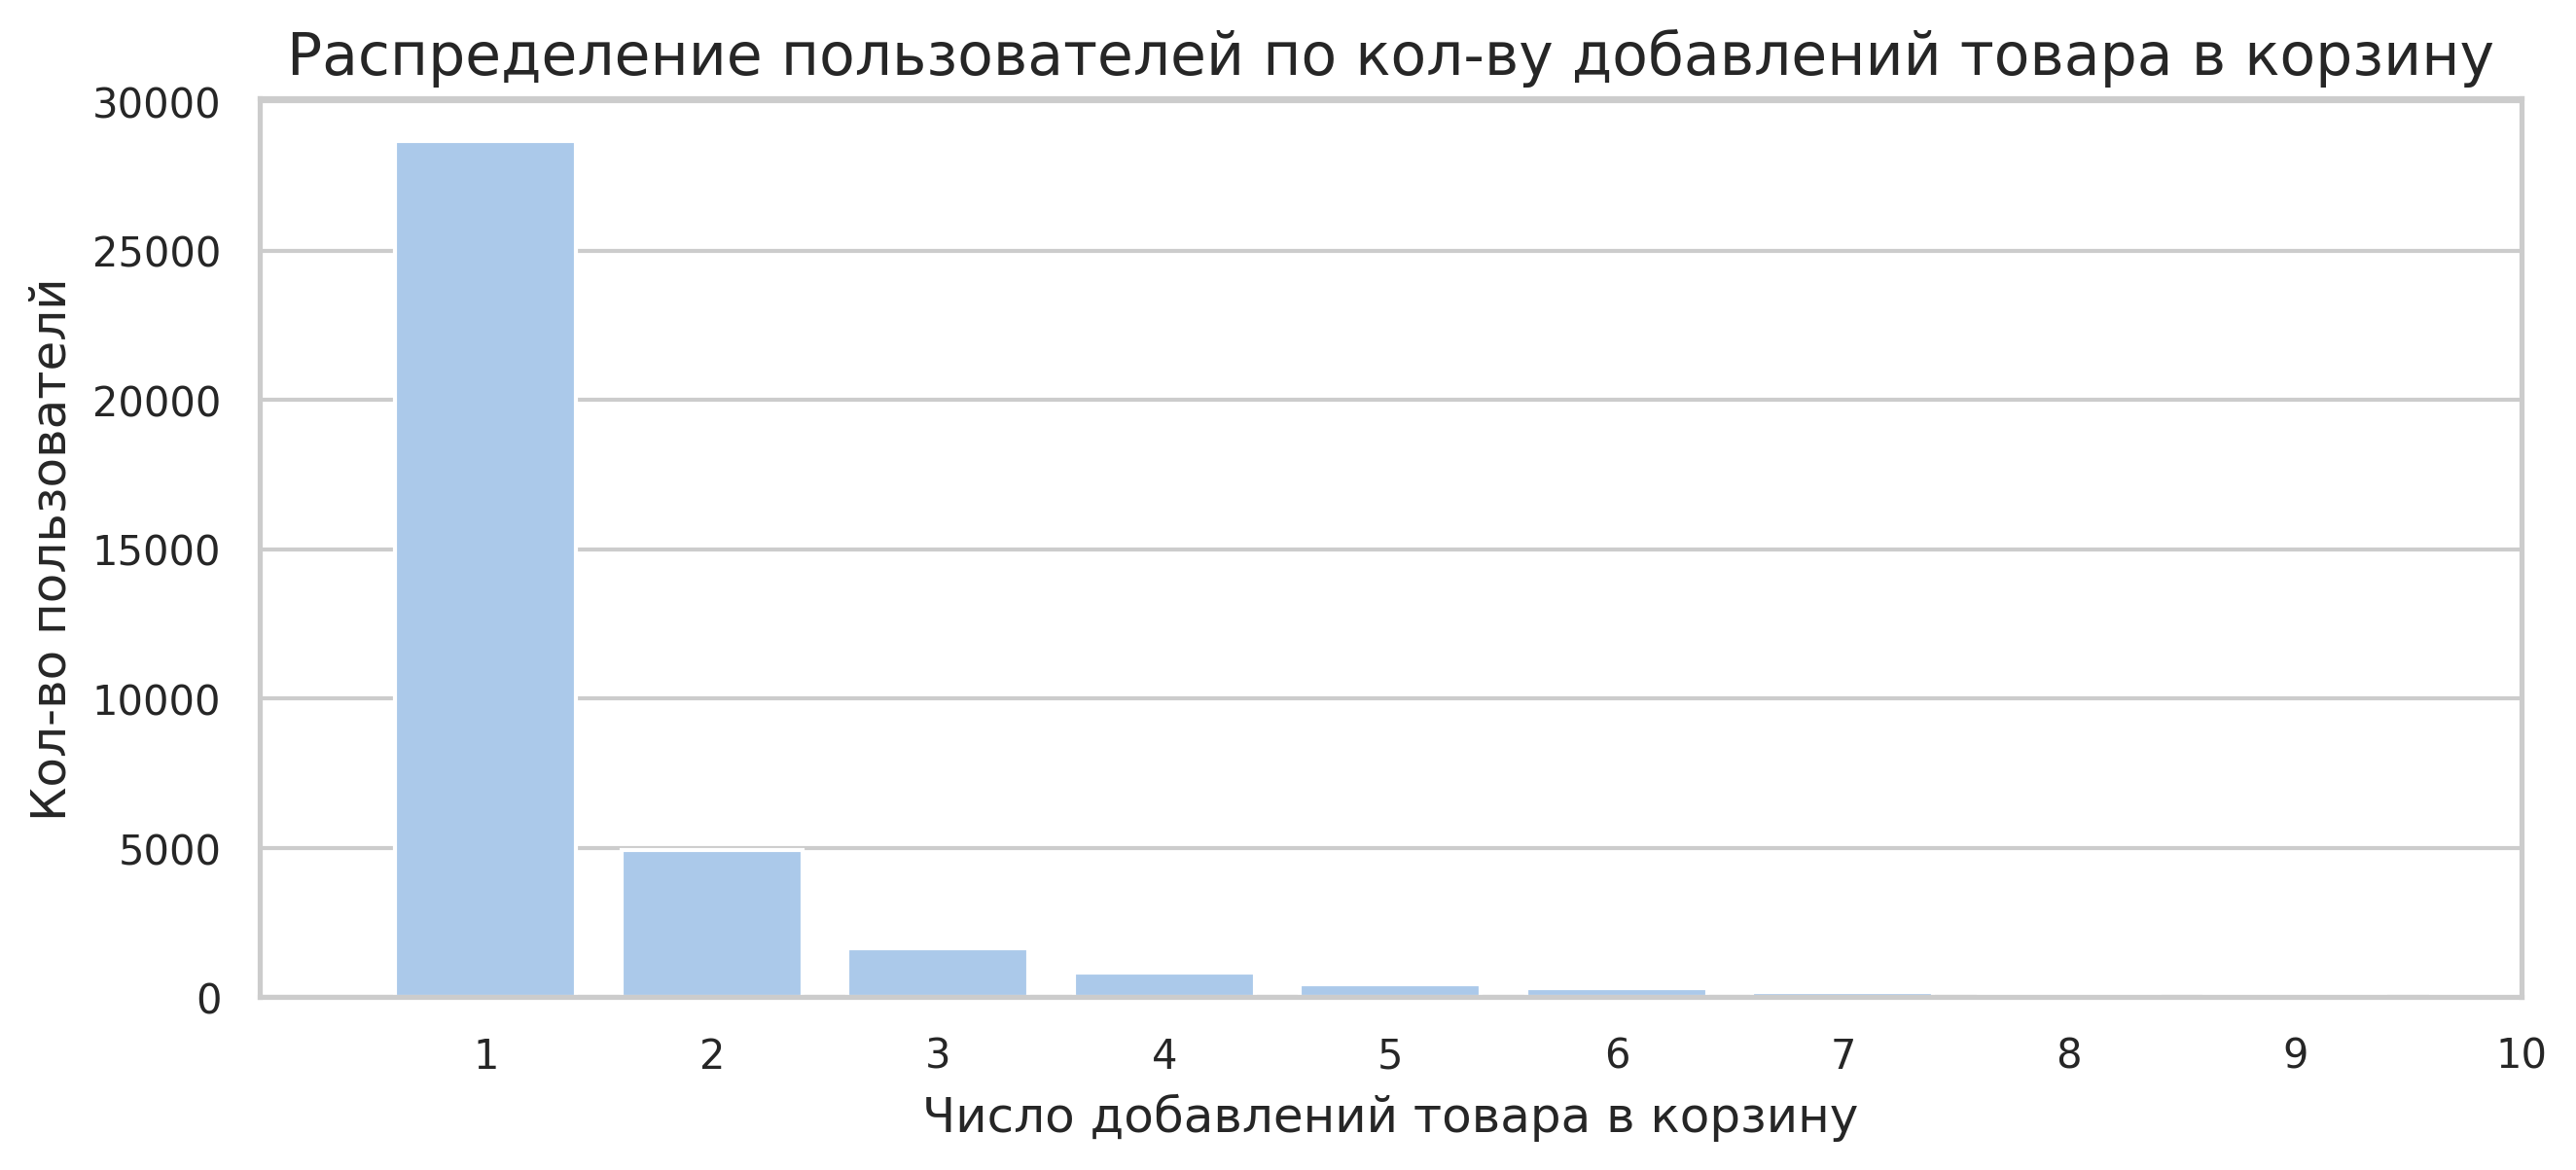

In [41]:
# –°–≥—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –∫–æ–ª-–≤—É —Å–æ–±—ã—Ç–∏–π –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É
events_users = (
    events
    .query("event == 'addtocart'")
    .groupby('user_id')
    .agg(event_count=('event', 'count'))
    .reset_index()
    .groupby('event_count')
    .agg(user_count=('user_id', 'count'))
    .reset_index()
)
ax = sns.barplot(
    events_users,
    x='event_count',
    y='user_count',
    color=sns.color_palette('pastel')[0]
)
ax.set_xlim((-1,9));
ax.set_xlabel('–ß–∏—Å–ª–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–π —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É')
ax.set_ylabel('–ö–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–π')
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –∫–æ–ª-–≤—É –¥–æ–±–∞–≤–ª–µ–Ω–∏–π —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É');

–ï—â–µ —Ä–∞–∑ –æ–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ, –Ω–∞ –Ω–∏–∑–∫—É—é —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã—Ö —Å–æ–±—ã—Ç–∏–π - –±–æ–ª–µ–µ 75% –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–ª—è–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É, —Å–¥–µ–ª–∞–ª–∏ —ç—Ç–æ —Ç–æ–ª—å–∫–æ 1 (–æ–¥–∏–Ω) —Ä–∞–∑. 

–ü—Ä–æ–≤–µ—Ä–∏–º, –≤—Å–µ –ª–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø—Ä–æ–∏—Å—Ö–æ–¥—è—Ç —Å —Ç–æ–≤–∞—Ä–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –µ—Å—Ç—å –≤ –∫–∞—Ç–∞–ª–æ–≥–µ items

In [42]:
events['item_id'].drop_duplicates().isin(items['item_id'].unique()).all()

np.False_

In [43]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö' —Ç–æ–≤–∞—Ä–æ–≤, —Ç.–µ. —Ç–µ—Ö, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ –∫–∞—Ç–∞–ª–æ–≥–µ,
# –Ω–æ —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –±—ã–ª–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è
itemids_in_items = set(items['item_id'].drop_duplicates())
itemids_in_events = set(events['item_id'].drop_duplicates())

weird_itemids = itemids_in_events - itemids_in_items

print(f'Weird (unknown) items in events: {len(weird_itemids)} '
      f'({len(weird_itemids)/len(itemids_in_events):.1%})')

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π —Å '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏' —Ç–æ–≤–∞—Ä–∞–º–∏
weird_events = events[events["item_id"].isin(weird_itemids)]
print(f'Interactions with weird (unknown) items: '
      f'{len(weird_events)} '
      f'({len(weird_events)/len(events):.1%})')

Weird (unknown) items in events: 49815 (21.2%)
Interactions with weird (unknown) items: 255585 (9.3%)


–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–±—ã—Ç–∏–π –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –æ–∫–æ–ª–æ 50 —Ç—ã—Å. '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö' —Ç–æ–≤–∞—Ä–æ–≤ (–æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –≤ –∫–∞—Ç–∞–ª–æ–≥–µ —Ç–æ–≤–∞—Ä–æ–≤ items), —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 20% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ç–æ–≤–∞—Ä–æ–≤, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏.  
 –ü—Ä–∏ —ç—Ç–æ–º, —Å—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π —Å '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏' —Ç–æ–≤–∞—Ä–∞–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç —Ç–æ–ª—å–∫–æ ~9% (255 —Ç—ã—Å.) –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Å–æ–±—ã—Ç–∏–π. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∏–Ω—Ç–µ—Ä–µ—Å (—Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π) –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∫ '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º' —Ç–æ–≤–∞—Ä–∞–º –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∏–∂–µ, —á–µ–º –∏–Ω—Ç–µ—Ä–µ—Å –∫ —Ç–æ–≤–∞—Ä–∞–º, –æ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –≤ —Ç–∞–±–ª–∏—Ü–µ items.

In [44]:
# –£–¥–∞–ª–∏–º —Å–æ–±—ã—Ç–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º' —Ç–æ–≤–∞—Ä–∞–º
events = events[
    events['item_id'].isin(items['item_id'].drop_duplicates())
].reset_index(drop=True)

–ü—Ä–æ–≤–µ—Ä–∏–º –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å (availability) —Ç–æ–≤–∞—Ä–∞ –≤ –º–æ–º–µ–Ω—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ –∫–æ—Ä–∑–∏–Ω—É - –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —Å–æ–±—ã—Ç–∏–π –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É –Ω–∞–π–¥–µ–º –ø–æ—Å–ª–µ–¥–Ω–µ–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ 'available' –∏–∑ —Ç–∞–±–ª–∏—Ü—ã items, –∫–æ—Ç–æ—Ä–æ–µ –±—ã–ª–æ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ –î–û –º–æ–º–µ–Ω—Ç–∞ —Å–∞–º–æ–≥–æ —Å–æ–±—ã—Ç–∏—è (–¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ –∫–æ—Ä–∑–∏–Ω—É).  

In [45]:
# –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –∫–∞—Ç–∞–ª–æ–≥, –æ—Å—Ç–∞–≤–∏–≤ —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ (availabilty)
items_availability = (
    items.query('property == "available"')
    .reset_index(drop=True)
)

In [46]:
# –í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–∞ –≤–æ–∑–±–º–µ–º —Å–æ–±—ã—Ç–∏—è —Ç–æ–ª—å–∫–æ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü (—Å–µ–Ω—Ç—è–±—Ä—å)
availability_values = pd.Series([
    # –±–µ—Ä–µ–º –ø–æ—Å–ª–µ–¥–Ω–µ–µ (–ø–æ –≤—Ä–µ–º–µ–Ω–∏) –∑–Ω–∞—á–µ–Ω–∏–µ availability
    values[-1]
    if len(values:=(
        # –∏–∑ –∫–∞—Ç–∞–ª–æ–≥–∞ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É —Ç–æ–≤–∞—Ä—É –∏ 
        # –≤—Ä–µ–º–µ–Ω–∏ –î–û –º–æ–º–µ–Ω—Ç–∞ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É
        items_availability[
            (items_availability['item_id'] == item_id)
            & (items_availability['timestamp'] < timestamp)
        ]
        .sort_values('timestamp')
        ['value']
        .tolist()
    ))
    else pd.NA  
    # –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∏ —Ç–æ–≤–∞—Ä—ã –¥–ª—è —Å–æ–±—ã—Ç–∏–π –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ –∫–æ—Ä–∑–∏–Ω—É
    for timestamp, item_id  
    in (
        events[
            (events['event'] == 'addtocart')
            & (events['timestamp'].dt.month == 9)
        ]
        [['timestamp', 'item_id']]
        .itertuples(index=False)
    )
])
availability_values.value_counts(dropna=False)

1       6980
0        446
<NA>     128
Name: count, dtype: int64

–í–∏–¥–∏–º –∑–Ω–∞—á–∏—Ç–ª–µ—å–Ω–æ–µ (~10%) —á–∏—Å–ª–æ —Å–æ–±—ã—Ç–∏–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö __–≤ –º–æ–º–µ–Ω—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ —Ç–æ–≤–∞—Ä–∞ –∫–æ—Ä–∑–∏–Ω—É —Å–∞–º —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–µ–¥–æ—Å—Ç—É–ø–µ–Ω (availabilty = 0) –∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ availability –≤–æ–æ–±—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª (–µ—â–µ –Ω–µ –±—ã–ª —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω)__  

–î–ª—è —á–∏—Å—Ç–æ—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –ø—Ä–æ–≤–µ—Ä–∏–º —Ç–∞–∫–∂–µ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å (availability) —Ç–æ–≤–∞—Ä–∞ __–≤ –º–æ–º–µ–Ω—Ç —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (–ø–æ–∫—É–ø–∫–∏)__ 

In [47]:
# –í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–∞ –≤–æ–∑–±–º–µ–º —Å–æ–±—ã—Ç–∏—è –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –¥–≤–∞ –º–µ—Å—è—Ü–∞ (–∞–≤–≥—É—Å—Ç-—Å–µ–Ω—Ç—è–±—Ä—å)
availability_values = pd.Series([
    # –±–µ—Ä–µ–º –ø–æ—Å–ª–µ–¥–Ω–µ–µ (–ø–æ –≤—Ä–µ–º–µ–Ω–∏) –∑–Ω–∞—á–µ–Ω–∏–µ availability
    values[-1]
    if len(values:=(
        # –∏–∑ –∫–∞—Ç–∞–ª–æ–≥–∞ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É —Ç–æ–≤–∞—Ä—É –∏ 
        # –≤—Ä–µ–º–µ–Ω–∏ –î–û –º–æ–º–µ–Ω—Ç–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (–ø–æ–∫—É–ø–∫–∏)
        items_availability[
            (items_availability['item_id'] == item_id)
            & (items_availability['timestamp'] < timestamp)
        ]
        .sort_values('timestamp')
        ['value']
        .tolist()
    ))
    else pd.NA  
    # –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∏ —Ç–æ–≤–∞—Ä—ã –¥–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–∫—É–ø–∫–∏
    for timestamp, item_id  
    in (
        events[
            (events['event'] == 'transaction')
            & (events['timestamp'].dt.month >= 8)
        ]
        [['timestamp', 'item_id']]
        .itertuples(index=False)
    )
])
availability_values.value_counts(dropna=False)

1       6200
0        500
<NA>     126
Name: count, dtype: int64

–î–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–∫—É–ø–∫–∏ —Ç–æ–≤–∞—Ä–∞ —Å–∏—Ç—É–∞–∏—è –∞–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è - –≤–∏–¥–∏–º –∑–Ω–∞—á–∏—Ç–ª–µ—å–Ω–æ–µ (~10%) —á–∏—Å–ª–æ —Å–æ–±—ã—Ç–∏–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö __–≤ –º–æ–º–µ–Ω—Ç –ø–æ–∫—É–ø–∫–∏ —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–µ–¥–æ—Å—Ç—É–ø–µ–Ω (availabilty = 0) –∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ availability –≤–æ–æ–±—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª (–µ—â–µ –Ω–µ –±—ã–ª —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω)__ 

–ö–∞–∫ —Å–ª–µ–¥—Å—Ç–≤–∏–µ, –±–∏–∑–Ω–µ—Å-–∑–Ω–∞—á–Ω–µ–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ (—Å–≤–æ–π—Å—Ç–≤–∞) availabilty —Ç—Ä–µ–±—É–µ—Ç —É—Ç–æ—á–Ω–µ–Ω–∏—è –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –µ–≥–æ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ (—Å–∏—Å—Ç–µ–º—ã —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π) –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –Ω–µ—Ü–µ–ª–µ—Å—Å–æ–±—Ä–∞–∑–Ω—ã–º. 

–ü—Ä–æ–≤–µ—Ä–∏–º, –Ω–∞–ª–∏—á–∏–µ —É —Ç–æ–≤–∞—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞ –æ—Ç–Ω–µ—Å–µ–Ω–∏—è –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –Ω–∞ –º–æ–º–µ–Ω—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ –∫–æ—Ä–∑–∏–Ω—É.

In [48]:
# –í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–∞ –≤–æ–∑–±–º–µ–º —Å–æ–±—ã—Ç–∏—è —Ç–æ–ª—å–∫–æ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü (—Å–µ–Ω—Ç—è–±—Ä—å)
category_values = pd.Series([
    # –±–µ—Ä–µ–º –ø–æ—Å–ª–µ–¥–Ω–µ–µ (–ø–æ –≤—Ä–µ–º–µ–Ω–∏) –∑–Ω–∞—á–µ–Ω–∏–µ category_id
    values[-1]
    if len(values:=(
        # –∏–∑ –∫–∞—Ç–∞–ª–æ–≥–∞ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É —Ç–æ–≤–∞—Ä—É –∏ 
        # –≤—Ä–µ–º–µ–Ω–∏ –î–û –º–æ–º–µ–Ω—Ç–∞ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É
        items_cats[
            (items_cats['item_id'] == item_id)
            & (items_cats['timestamp'] < timestamp)
        ]
        .sort_values('timestamp')
        ['category_id']
        .tolist()
    ))
    else pd.NA  
    # –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∏ —Ç–æ–≤–∞—Ä—ã –¥–ª—è —Å–æ–±—ã—Ç–∏–π –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ –∫–æ—Ä–∑–∏–Ω—É
    for timestamp, item_id  
    in (
        events[
            (events['event'] == 'addtocart')
            & (events['timestamp'].dt.month == 9)
        ]
        [['timestamp', 'item_id']]
        .itertuples(index=False)
    )
])

# –ö–æ–ª-–≤–æ —Å–æ–±—ã—Ç–∏–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –≤ –º–æ–º–µ–Ω—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ –∫–æ—Ä–∑–∏–Ω—É 
# –≤ –∫–∞—Ç–∞–ª–æ–≥–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç (–µ—â–µ –Ω–µ –¥–æ–±–∞–≤–ª–µ–Ω) –ø—Ä–∏–∑–Ω–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞
print('Events with item category_id not set (yet): '
      f'{category_values.isna().sum()} '
      f'({category_values.isna().sum() / len(category_values):.1%})')

Events with item category_id not set (yet): 140 (1.9%)


__–î–ª—è ~2% —Å–æ–±—ã—Ç–∏–π –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É, –≤ –º–æ–º–µ–Ω—Ç —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è —Å–æ–±—ã—Ç–∏—è –≤ –∫–∞—Ç–∞–ª–æ–≥–µ items –µ—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª–∞ –∑–∞–ø–∏—Å—å –æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞__ - –¥—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, –≤ —ç—Ç–∏—Ö —Å–ª—É—á–∞—è—Ö –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞ (category_id) –ø–æ—è–≤–ª—è–µ—Ç—Å—è –≤ –∫–∞—Ç–∞–ª–æ–≥–µ itemd –ø–æ–∑–∂–µ, —á–µ–º –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å–∞–º–æ —Å–æ–±—ã—Ç–∏–µ (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É). 


__–í—ã–≤–æ–¥—ã –ø–æ —Å–æ–±—ã—Ç–∏—è–º__:

- –¢–∞–±–ª–∏—Ü–∞ —Å–æ–±—ã—Ç–∏–π —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ 2.7 –º–ª–Ω. –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ —Ç–æ–≤–∞—Ä–æ–≤ –≤ –ø–µ—Ä–∏–æ–¥ —Å 2015-05-03 –ø–æ 2015-09-18  

- 97% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Å–æ–±—ã—Ç–∏–π —ç—Ç–æ –ø—Ä–æ—Å–º–æ—Ç—Ä —Ç–æ–≤–∞—Ä–∞, 70 —Ç—ã—Å.(3%) - –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É, 22 —Ç—ã—Å.(1%) - –ø–æ–∫—É–ø–∫–∞. 

- –í—Å–µ–≥–æ —Å —Å–µ—Ä–≤–∏—Å–æ–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞–ª–æ 1.4 –º–ª–Ω. —É–Ω–∏–∞–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –ø—Ä–∏ —ç—Ç–æ–º –¥–æ–±–∞–≤–ª—è–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É —Ç–æ–ª—å–∫–æ 37 —Ç—ã—Å. (3%), –∞ —Å–æ–≤–µ—Ä—à–∏–ª–∏ –ø–æ–∫—É–ø–∫—É 12 —Ç—ã—Å. (1%)  

- –í—Å–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–ª–∏ 239 —Ç—ã—Å. —É–Ω–∏–∞–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤, –ø—Ä–∏ —ç—Ç–æ–º –¥–æ–±–∞–≤–∏–ª–∏ –≤ –∫–æ—Ä–∏–∑–∏–Ω—É 23 —Ç—ã—Å. —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ (~10% –æ—Ç –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö), –∞ –∫—É–ø–∏–ª–∏ 12 —Ç—ã—Å. (~5% –æ—Ç –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö).

- –ü–æ—Ç–æ–∫ —Å–æ–±—ã—Ç–∏–π (–≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π) –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å —Ç–æ–≤–∞—Ä–∞–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω —Å –º–∞—è –ø–æ —Å–µ–Ω—Ç—è–±—Ä—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ, –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É—é—Ç (–≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø–æ—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç) —Ç–æ–≤–∞—Ä—ã –æ–∫–æ–ª–æ 20 —Ç—ã—Å. —Ä–∞–∑ –≤ –¥–µ–Ω—å.   

- –ó–Ω–∞—á–∏–º—ã–µ —Å–æ–±—ã—Ç–∏—è (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É, –ø–æ–∫—É–ø–∫–∞) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏ —Ç–∞–∫–∂–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ (—Å —É—á–µ—Ç–æ–º –Ω–µ–¥–µ–ª—å–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏), –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –¥–æ–±–∞–≤–ª—è—é—Ç —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É –æ–∫–æ–ª–æ 500 —Ä–∞–∑ –≤ –¥–µ–Ω—å, —Å–æ–≤–µ—Ä—à–∞—é—Ç –ø–æ–∫—É–ø–∫—É –æ–∫–æ–ª–æ 160 —Ä–∞–∑ –≤ –¥–µ–Ω—å.

- –ï—â–µ —Ä–∞–∑ –æ–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ, –Ω–∞ –Ω–∏–∑–∫—É—é —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã—Ö —Å–æ–±—ã—Ç–∏–π - –±–æ–ª–µ–µ 75% –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–ª—è–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É, —Å–¥–µ–ª–∞–ª–∏ —ç—Ç–æ —Ç–æ–ª—å–∫–æ 1 (–æ–¥–∏–Ω) —Ä–∞–∑. 

- –í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–±—ã—Ç–∏–π –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –æ–∫–æ–ª–æ 50 —Ç—ã—Å. '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö' —Ç–æ–≤–∞—Ä–æ–≤ (–æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –≤ –∫–∞—Ç–∞–ª–æ–≥–µ —Ç–æ–≤–∞—Ä–æ–≤ items), —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 20% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ç–æ–≤–∞—Ä–æ–≤, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏.  
 –ü—Ä–∏ —ç—Ç–æ–º, —Å—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π —Å '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏' —Ç–æ–≤–∞—Ä–∞–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç —Ç–æ–ª—å–∫–æ ~9% (255 —Ç—ã—Å.) –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Å–æ–±—ã—Ç–∏–π. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∏–Ω—Ç–µ—Ä–µ—Å (—Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π) –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∫ '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º' —Ç–æ–≤–∞—Ä–∞–º –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∏–∂–µ, —á–µ–º –∏–Ω—Ç–µ—Ä–µ—Å –∫ —Ç–æ–≤–∞—Ä–∞–º, –æ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –≤ —Ç–∞–±–ª–∏—Ü–µ items.

- –£–¥–∞–ª–∏–º —Å–æ–±—ã—Ç–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º' —Ç–æ–≤–∞—Ä–∞–º

- –í–∏–¥–∏–º –∑–Ω–∞—á–∏—Ç–ª–µ—å–Ω–æ–µ (~10%) —á–∏—Å–ª–æ —Å–æ–±—ã—Ç–∏–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –≤ –º–æ–º–µ–Ω—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ —Ç–æ–≤–∞—Ä–∞ –∫–æ—Ä–∑–∏–Ω—É —Å–∞–º —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–µ–¥–æ—Å—Ç—É–ø–µ–Ω (availabilty = 0) –∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ availability –≤–æ–æ–±—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª (–µ—â–µ –Ω–µ –±—ã–ª —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω)  –î–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–∫—É–ø–∫–∏ —Ç–æ–≤–∞—Ä–∞ —Å–∏—Ç—É–∞–∏—è –∞–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è - –≤–∏–¥–∏–º –∑–Ω–∞—á–∏—Ç–ª–µ—å–Ω–æ–µ (~10%) —á–∏—Å–ª–æ —Å–æ–±—ã—Ç–∏–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –≤ –º–æ–º–µ–Ω—Ç –ø–æ–∫—É–ø–∫–∏ —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–µ–¥–æ—Å—Ç—É–ø–µ–Ω (availabilty = 0) –∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ availability –≤–æ–æ–±—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª.  
–ö–∞–∫ —Å–ª–µ–¥—Å—Ç–≤–∏–µ, –±–∏–∑–Ω–µ—Å-–∑–Ω–∞—á–Ω–µ–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ (—Å–≤–æ–π—Å—Ç–≤–∞) availabilty —Ç—Ä–µ–±—É–µ—Ç —É—Ç–æ—á–Ω–µ–Ω–∏—è –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –µ–≥–æ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ (—Å–∏—Å—Ç–µ–º—ã —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π) –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –Ω–µ—Ü–µ–ª–µ—Å—Å–æ–±—Ä–∞–∑–Ω—ã–º. 

- –î–ª—è ~2% —Å–æ–±—ã—Ç–∏–π –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É, –≤ –º–æ–º–µ–Ω—Ç —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è —Å–æ–±—ã—Ç–∏—è –≤ –∫–∞—Ç–∞–ª–æ–≥–µ items –µ—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª–∞ –∑–∞–ø–∏—Å—å –æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞ - –¥—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, –≤ —ç—Ç–∏—Ö —Å–ª—É—á–∞—è—Ö –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞ (category_id) –ø–æ—è–≤–ª—è–µ—Ç—Å—è –≤ –∫–∞—Ç–∞–ª–æ–≥–µ items –ø–æ–∑–∂–µ, —á–µ–º –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å–∞–º–æ —Å–æ–±—ã—Ç–∏–µ (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É). 

### 5. –¢–∏–ø–∏—á–Ω—ã–π –ø—Ä–æ—Ñ–∏–ª—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å —Å–∏—Å—Ç–µ–º–æ–π

–£—á–∏—Ç—ã–≤–∞—è –Ω–∏–∑–∫—É—é —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã—Ö —Å–æ–±—ã—Ç–∏–π - –±–æ–ª–µ–µ 75% –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–ª—è–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É, —Å–¥–µ–ª–∞–ª–∏ —ç—Ç–æ —Ç–æ–ª—å–∫–æ 1 (–æ–¥–∏–Ω) —Ä–∞–∑, —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ —Ç–∏–ø–∏—á–Ω—ã–π –ø—Ä–æ—Ñ–∏–ª—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.   
–û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–±—ã—Ç–∏–π, –æ—Å—Ç–∞–≤–∏–≤ —Ç–æ–ª—å–∫–æ '—Ü–µ–ª–µ–≤—ã—Ö' –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π - —Ç–µ—Ö, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–∏–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É.

In [49]:
# –û—Å—Ç–∞–≤–ª—è–µ–º —Å–æ–±—ã—Ç–∏—è —Ç–æ–ª—å–∫–æ –¥–ª—è —Ç–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–π,
# –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–≤–µ—Ä—à–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ
effective_users = set(
    events.query('event == "addtocart"')['user_id']
    .drop_duplicates()
)

effective_events = events[events['user_id'].isin(effective_users)].copy()

print(f'Effective users: {len(effective_users)}')

Effective users: 37387


In [50]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª-–≤–æ –∏ —Ç–∏–ø—ã —Å–æ–±—ã—Ç–∏–π –¥–ª—è –µ–¥–∏–Ω–∏—á–Ω–æ–≥–æ(!) –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
events_count = (
    effective_events.groupby('user_id')['event'].value_counts().rename('count_per_user').reset_index()
)
events_count.head(6)

user_id      event  count_per_user
0        6       view               5
1        6  addtocart               1
2      150       view               3
3      150  addtocart               1
4      155  addtocart               7
5      155       view               7

In [51]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
(
    events_count.groupby('event')['count_per_user'].describe()
    [['count', 'mean', '25%', '50%', '75%']]
)

count  mean  25%  50%  75%
event                                     
addtocart   37,387.00  1.83 1.00 1.00 1.00
transaction 10,454.00  1.99 1.00 1.00 1.00
view        34,033.00  9.12 2.00 3.00 7.00

__NB!__ –í–∏–¥–∏–º 3 —Ç—ã—Å. (~9% –æ—Ç —Ü–µ–ª–µ–≤—ã—Ö) –ø–æ–ª–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ(!) —Å–æ–±—ã—Ç–∏–µ —ç—Ç–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É - —Ç.–µ. –æ–Ω–∏ '–Ω–∏—á–µ–≥–æ –Ω–µ —Å–º–æ—Ç—Ä—è—Ç' - —Å—Ä–∞–∑—É –¥–æ–±–∞–≤–ª—è—é—Ç —Ç–æ–≤–∞—Ä.   

–ú–µ–¥–∏–∞–Ω–Ω–æ–µ —á–∏—Å–ª–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ —Ç–æ–≤–∞—Ä–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º –ø–µ—Ä–µ–¥ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –≤ –∫–æ—Ä–∑–∏–Ω—É - 3 (—Ç—Ä–∏) –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ (!)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—â–µ–µ –≤—Ä–µ–º—è –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å —Å–∏—Å—Ç–µ–º–æ–π –ø—Ä–∏ 1 (–æ–¥–Ω–æ–º) –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –≤ –∫–æ—Ä–∑–∏–Ω—É

In [52]:
# –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Å –æ–¥–Ω–∏–º –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É
users_single_addtocart = (
    events_count
    .query('event == "addtocart" and count_per_user == 1')
    ['user_id']
)

# –†–∞—Å—Å—á–∏—Ç–∞–µ–º –æ–±—â–µ–µ –≤—Ä–µ–º—è –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è
periods = (
    effective_events[effective_events['user_id'].isin(users_single_addtocart)]
    .groupby('user_id')
    .agg(start=('timestamp', 'min'), end=('timestamp', 'max'))
)
periods['duration'] = periods['end'] - periods['start']

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
periods['duration'].describe()[
    ['count', 'mean', '25%', '50%', '75%']
].to_frame()

duration
count                      28386
mean   5 days 09:05:34.772340625
25%       0 days 00:01:17.794500
50%       0 days 00:08:53.564500
75%       0 days 16:34:28.229000

–ú–µ–¥–∏–∞–Ω–Ω–Ω–æ–µ –≤—Ä–µ–º—è –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å —Å–∏—Å—Ç–µ–º–æ–π –ø—Ä–∏ –µ–¥–∏–Ω–∏—á–Ω–æ–π –ø–æ–∫—É–ø–∫–µ - –æ–∫–æ–ª–æ 10 –º–∏–Ω—É—Ç.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–æ–±—ã—Ç–∏–µ, –ø—Ä–µ–¥—â–µ—Å—Ç–≤—É—é—â–µ–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏—é —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ–∑–∏–Ω—É

In [ ]:
# –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º —Å–æ–±—ã—Ç–∏—è 
effective_events.sort_values(by=['user_id', 'timestamp'], inplace=True,
                             ignore_index=True)

# –î–æ–±–∞–≤–∏–º –∫ —Å–æ–±—ã—Ç–∏—è–º –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ user_id, item_id –∏ event 
effective_events['prev_user_id'] = effective_events['user_id'].shift(1)
effective_events['prev_item_id'] = effective_events['item_id'].shift(1)
effective_events['prev_event'] = effective_events['event'].shift(1)

# –î–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫ —Ç–æ–≥–æ, —á—Ç–æ –ø—Ä–µ–¥—ã–¥—É—â–µ–µ —Å–æ–±—ã—Ç–∏–µ —ç—Ç–æ –ø—Ä–æ—Å–º–æ—Ç—Ä —Ç–æ–≥–æ –∂–µ —Ç–æ–≤–∞—Ä–∞
effective_events['follows_same_item_view'] = (
    (effective_events['user_id'] == effective_events['prev_user_id'])
    & (effective_events['item_id'] == effective_events['prev_item_id'])
    & (effective_events['prev_event'] == 'view')
)

# –ü–µ—Ä–µ–¥ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –≤ –∫–æ—Ä–∑–∏–Ω—É –±—ã–ª–æ —Å–æ–±—ã—Ç–∏–µ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ç–æ–≥–æ –∂–µ —Ç–æ–≤–∞—Ä–∞?
(
    effective_events.query('event == "addtocart"')['follows_same_item_view']
    .value_counts(normalize=True)
)

follows_same_item_view
True    0.63
False   0.37
Name: proportion, dtype: float64


__‚ùó –¢–∏–ø–∏—á–Ω—ã–π –ø—Ä–æ—Ñ–∏–ª—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è '—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ' –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è:__    
 - __–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ—Ç–µ–ª—å –ø—Ä–∏—Ö–æ–¥–∏—Ç '–±–µ–∑ –∏—Å—Ç–æ—Ä–∏–∏'__ 
 - __–ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–æ–≤–∞—Ä–æ–≤ (2-7)__ 
 - __–¥–æ–±–∞–≤–ª—è–µ—Ç –æ–¥–∏–Ω –≤ –∫–æ—Ä–∑–∏–Ω—É__
 - __–∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –ø–æ—Å–ª–µ–¥–Ω–∏–π –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–π__ 
 - __–≤—Ä–µ–º—è –Ω–∞ –≤—Å–µ –ø—Ä–æ –≤—Å–µ –ø–æ—Ä—è–¥–∫–∞ 10 –º–∏–Ω—É—Ç__ 


### –ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º EDA

__–î–µ—Ä–µ–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π__:

 - –î–µ—Ä–µ–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ç–æ–≤–∞—Ä–æ–≤ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 1669 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ 25 –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–µ—Ä—Ö–Ω–µ–≥–æ (–ø–µ—Ä–≤–æ–≥–æ) —É—Ä–æ–≤–Ω—è. –í —Å—Ä–µ–¥–Ω–µ–º, –∫–∞–∂–¥–∞—è –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Ä–æ–≤–Ω—è —Å–æ–¥–µ—Ä–∂–∏—Ç –æ–∫–æ–ª–æ ~50 –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–π.  

 - __–ù–∞–∑–≤–∞–Ω–∏—è (–æ–ø–∏—Å–∞–Ω–∏—è) –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, —Å–¥–µ–ª–∞—Ç—å –∫–∞–∫–∏–µ –ª–∏–±–æ –≤—ã–≤–æ–¥—ã –æ –ø—Ä–∏—Ä–æ–¥–µ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ (–±—ã—Ç–æ–≤–∞—è —Ç–µ—Ö–Ω–∏–∫–∞, –∫–Ω–∏–≥–∏, —Ñ–∏–ª—å–º—ã) –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤–æ–∑–º–æ–∂–Ω—ã–º.__

__–ö–∞—Ç–∞–ª–æ–≥ —Ç–æ–≤–∞—Ä–æ–≤__:
- –ö–∞—Ç–∞–ª–æ–≥ —Å–æ–¥–µ—Ä–∂–∏—Ç 417 —Ç—ã—Å. —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤  

- –ò–º–µ–µ–º 1104 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π —Å–≤–æ–π—Å—Ç–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'property'. –ó–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –¥–≤—É—Ö —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π ('categoryid', 'available'), –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è 'property' —è–≤–ª—è—é—Ç—Å—è —á–∏—Å–ª–æ–≤—ã–º–∏. –î–∞–Ω–Ω—ã—Ö –¥–ª—è —Ä–∞—Å—à–∏—Ñ—Ä–æ–≤–∫–∏ (–¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—è) —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 'property' —É –Ω–∞—Å –Ω–µ—Ç –∏, –∫ —Ç–æ–º—É –∂–µ, –∑–Ω–∞—á–µ–Ω–∏—è 'values' –¥–ª—è –Ω–∏—Ö —Ç–∞–∫–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –∑–∞–∫–æ–¥—Ä–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ - –∏–≥–Ω–æ—Ä–∏—Ä—É–µ–º (—É–¥–∞–ª–∏–º) —á–∏—Å–ª–æ–≤—ã–µ 'properties' –∏–∑ –∫–∞—Ç–∞–ª–æ–≥–∞ items.   

- –í—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ (timestamp) –∑–∞–ø–∏—Å–µ–π –≤ —Ç–∞–±–ª–∏—Ü–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 2015-05-10 –¥–æ 2015-09-13  

- __–í—Å–µ —Ç–æ–≤–∞—Ä—ã –≤ –∫–∞—Ç–∞–ª–æ–≥–∏ –∏–º–µ—é—Ç —Å–≤–æ–π—Å—Ç–≤–æ (property) 'available', –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è 0 –∏–ª–∏ 1__ - —Å—É–¥—è –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é, —Ä–µ—á—å –∏–¥—ë—Ç –æ –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–∞. –ü—Ä–∏ —ç—Ç–æ–º, –∫–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã, –≤ —Ä–∞–∑–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏ —Å–≤–æ–π—Å—Ç–≤–æ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è - __—ç—Ç–æ, —Å –±–æ–ª—å—à–æ–π –¥–æ–ª–µ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, –æ—Ç—Ä–∞–∂–∞–µ—Ç –∏—Å—Ç–æ—Ä–∏—é –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ —Ç–æ–≤–∞—Ä–∞ –∫ –ø–æ–∫—É–ø–∫–µ –≤ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏.__  

- –í—Å–µ —Ç–æ–≤–∞—Ä—ã –≤ —Ç–∞–±–ª–∏—Ü–µ –∏–º–µ—é—Ç –ø—Ä–∏–∑–Ω–∫ (categoryid) –æ—Ç–Ω–µ—Å–µ–Ω–∏—è –∫ –∫–∞–∫–æ–π-–ª–∏–±–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫—É –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏, –ø—Ä–∏–∑–Ω–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (categoryid) –º–æ–∂–µ—Ç –∏–∑–º–µ–Ω—è–µ—Ç—å—Å—è —Å —Ç–µ—á–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏ __[!] –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: –ø—Ä–∏–º–µ–º, —á—Ç–æ —Ç–æ–≤–∞—Ä –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –æ–¥–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, —Å —Å–∞–º–æ–π –ø–æ—Å–ª–µ–¥–Ω–µ–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –º–µ—Ç–∫–æ–π (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞—Å—á–µ—Ç–∞)__.   

- –í –∫–∞—Ç–µ–ª–æ–≥–µ —Ç–æ–≤–∞—Ä–æ–≤ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç 30 '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö' –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –¥–µ—Ä–µ–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π (—Ç–∞–±–∏—Ü–∞ category_tree). –° —ç—Ç–∏–º–∏ '–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏' –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ —Å–≤—è–∑–∞–Ω–æ 137 —Ç–æ–≤–∞—Ä–æ–≤. –ë—É–¥–µ–º –Ω–∞–¥–µ—è—Ç—å—Å—è, —á—Ç–æ —Å –¥–∞–Ω–Ω—ã–º–∏ —Ç–æ–≤–∞—Ä–∞–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –Ω–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É—é—Ç üòâ 

- –ò–∑ –±–æ–ª–µ–µ 400 —Ç—ã—Å. —Ç–æ–≤–∞—Ä–æ–≤ –Ω–∞ –∫–æ–Ω–µ—Ü –∏–∑–≤–µ—Å—Ç–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ (2015-09-13) –¥–æ—Å—Ç—É–ø–Ω–æ –∫ –ø–æ–∫—É–ø–∫–µ –æ–∫–æ–ª–æ 54 —Ç—ã—Å. (13%)

__–°–æ–±—ã—Ç–∏—è__:

- –¢–∞–±–ª–∏—Ü–∞ —Å–æ–±—ã—Ç–∏–π —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ 2.7 –º–ª–Ω. –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ —Ç–æ–≤–∞—Ä–æ–≤ –≤ –ø–µ—Ä–∏–æ–¥ —Å 2015-05-03 –ø–æ 2015-09-18  

- 97% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Å–æ–±—ã—Ç–∏–π —ç—Ç–æ –ø—Ä–æ—Å–º–æ—Ç—Ä —Ç–æ–≤–∞—Ä–∞, 70 —Ç—ã—Å.(3%) - –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É, 22 —Ç—ã—Å.(1%) - –ø–æ–∫—É–ø–∫–∞. 

- –í—Å–µ–≥–æ —Å —Å–µ—Ä–≤–∏—Å–æ–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞–ª–æ 1.4 –º–ª–Ω. —É–Ω–∏–∞–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –ø—Ä–∏ —ç—Ç–æ–º –¥–æ–±–∞–≤–ª—è–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É —Ç–æ–ª—å–∫–æ 37 —Ç—ã—Å. (3%), –∞ —Å–æ–≤–µ—Ä—à–∏–ª–∏ –ø–æ–∫—É–ø–∫—É 12 —Ç—ã—Å. (1%)  

- –í—Å–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–ª–∏ 239 —Ç—ã—Å. —É–Ω–∏–∞–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤, –ø—Ä–∏ —ç—Ç–æ–º –¥–æ–±–∞–≤–∏–ª–∏ –≤ –∫–æ—Ä–∏–∑–∏–Ω—É 23 —Ç—ã—Å. —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ (~10% –æ—Ç –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö), –∞ –∫—É–ø–∏–ª–∏ 12 —Ç—ã—Å. (~5% –æ—Ç –ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö).

- –ü–æ—Ç–æ–∫ —Å–æ–±—ã—Ç–∏–π (–≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π) –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å —Ç–æ–≤–∞—Ä–∞–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω —Å –º–∞—è –ø–æ —Å–µ–Ω—Ç—è–±—Ä—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ, –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É—é—Ç (–≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø–æ—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç) —Ç–æ–≤–∞—Ä—ã –æ–∫–æ–ª–æ 20 —Ç—ã—Å. —Ä–∞–∑ –≤ –¥–µ–Ω—å.   

- –ó–Ω–∞—á–∏–º—ã–µ —Å–æ–±—ã—Ç–∏—è (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É, –ø–æ–∫—É–ø–∫–∞) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏ —Ç–∞–∫–∂–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ (—Å —É—á–µ—Ç–æ–º –Ω–µ–¥–µ–ª—å–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏), –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –¥–æ–±–∞–≤–ª—è—é—Ç —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É –æ–∫–æ–ª–æ 500 —Ä–∞–∑ –≤ –¥–µ–Ω—å, —Å–æ–≤–µ—Ä—à–∞—é—Ç –ø–æ–∫—É–ø–∫—É –æ–∫–æ–ª–æ 160 —Ä–∞–∑ –≤ –¥–µ–Ω—å.

- –ï—â–µ —Ä–∞–∑ –æ–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ, –Ω–∞ –Ω–∏–∑–∫—É—é —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã—Ö —Å–æ–±—ã—Ç–∏–π - __–±–æ–ª–µ–µ 75% –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–ª—è–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É, —Å–¥–µ–ª–∞–ª–∏ —ç—Ç–æ —Ç–æ–ª—å–∫–æ 1 (–æ–¥–∏–Ω) —Ä–∞–∑ [!]__. 

- __–í —Ç–∞–±–ª–∏—Ü–µ —Å–æ–±—ã—Ç–∏–π –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –æ–∫–æ–ª–æ 50 —Ç—ã—Å. '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö' —Ç–æ–≤–∞—Ä–æ–≤ (–æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –≤ –∫–∞—Ç–∞–ª–æ–≥–µ —Ç–æ–≤–∞—Ä–æ–≤ items)__, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 20% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ç–æ–≤–∞—Ä–æ–≤, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏.  
 –ü—Ä–∏ —ç—Ç–æ–º, —Å—É–º–º–∞—Ä–Ω–æ–µ —á–∏—Å–ª–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π —Å '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏' —Ç–æ–≤–∞—Ä–∞–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç —Ç–æ–ª—å–∫–æ ~9% (255 —Ç—ã—Å.) –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Å–æ–±—ã—Ç–∏–π. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∏–Ω—Ç–µ—Ä–µ—Å (—Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π) –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∫ '–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º' —Ç–æ–≤–∞—Ä–∞–º –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∏–∂–µ, —á–µ–º –∏–Ω—Ç–µ—Ä–µ—Å –∫ —Ç–æ–≤–∞—Ä–∞–º, –æ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –≤ —Ç–∞–±–ª–∏—Ü–µ items.

- –í–∏–¥–∏–º –∑–Ω–∞—á–∏—Ç–ª–µ—å–Ω–æ–µ (~10%) —á–∏—Å–ª–æ —Å–æ–±—ã—Ç–∏–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö __–≤ –º–æ–º–µ–Ω—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ —Ç–æ–≤–∞—Ä–∞ –∫–æ—Ä–∑–∏–Ω—É —Å–∞–º —Ç–æ–≤–∞—Ä –±—ã–ª –Ω–µ–¥–æ—Å—Ç—É–ø–µ–Ω (availabilty = 0) –∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ availability –≤–æ–æ–±—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª (–µ—â–µ –Ω–µ –±—ã–ª —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω)__. –î–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–∫—É–ø–∫–∏ —Ç–æ–≤–∞—Ä–∞ —Å–∏—Ç—É–∞–∏—è –∞–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è.
–ö–∞–∫ —Å–ª–µ–¥—Å—Ç–≤–∏–µ, __—Å–¥–µ–ª–∞–Ω–Ω–æ–µ –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –∫–∞—Ç–∞–ª–æ–≥–∞ —Ç–æ–≤–∞—Ä–æ–≤ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ –æ –±–∏–∑–Ω–µ—Å-–∑–Ω–∞—á–µ–Ω–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ (—Å–≤–æ–π—Å—Ç–≤–∞) availabilty —è–≤–ª—è–µ—Ç—Å—è –æ—à–∏–±–æ—á–Ω—ã–º__ –∏ —Ç—Ä–µ–±—É–µ—Ç —É—Ç–æ—á–Ω–µ–Ω–∏—è. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ availabilty –µ–≥–æ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ (—Å–∏—Å—Ç–µ–º—ã —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π) –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –Ω–µ—Ü–µ–ª–µ—Å—Å–æ–±—Ä–∞–∑–Ω—ã–º. 

- __–î–ª—è ~2% —Å–æ–±—ã—Ç–∏–π –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É, –≤ –º–æ–º–µ–Ω—Ç —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è —Å–æ–±—ã—Ç–∏—è –≤ –∫–∞—Ç–∞–ª–æ–≥–µ items –µ—â–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª–∞ –∑–∞–ø–∏—Å—å –æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞__ - –¥—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, –≤ —ç—Ç–∏—Ö —Å–ª—É—á–∞—è—Ö –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞ (category_id) –ø–æ—è–≤–ª—è–µ—Ç—Å—è –≤ –∫–∞—Ç–∞–ª–æ–≥–µ items –ø–æ–∑–∂–µ, —á–µ–º –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å–∞–º–æ —Å–æ–±—ã—Ç–∏–µ (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ –∫–æ—Ä–∑–∏–Ω—É). 

__–¢–∏–ø–∏—á–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–æ—Ñ–∏–ª—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å —Å–∏—Å—Ç–µ–º–æ–π__

- –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–±—ã—Ç–∏–π, –æ—Å—Ç–∞–≤–∏–≤ —Ç–æ–ª—å–∫–æ '—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö' –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π - —Ç–µ—Ö, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–±–∞–≤–∏–ª–∏ —Ç–æ–≤–∞—Ä –≤ –∫–æ—Ä–∑–∏–Ω—É.  

- –ú–µ–¥–∏–∞–Ω–Ω–æ–µ —á–∏—Å–ª–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ —Ç–æ–≤–∞—Ä–∞ –ø–µ—Ä–µ–¥ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –≤ –∫–æ—Ä–∑–∏–Ω—É - 3 (—Ç—Ä–∏) –ø—Ä–æ—Å–º–æ—Ç—Ä–∞. –ü—Ä–∏ —ç—Ç–æ–º –≤–∏–¥–∏–º 3 —Ç—ã—Å. (~9% –æ—Ç —Ü–µ–ª–µ–≤—ã—Ö) –ø–æ–ª–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ(!) —Å–æ–±—ã—Ç–∏–µ —ç—Ç–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ç–æ–≤–∞—Ä–∞ –≤ –∫–æ—Ä–∑–∏–Ω—É - —Ç.–µ. –æ–Ω–∏ '–Ω–∏—á–µ–≥–æ –Ω–µ —Å–º–æ—Ç—Ä—è—Ç' - —Å—Ä–∞–∑—É –¥–æ–±–∞–≤–ª—è—é—Ç —Ç–æ–≤–∞—Ä.

- __‚ùó –¢–∏–ø–∏—á–Ω—ã–π –ø—Ä–æ—Ñ–∏–ª—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è '—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ' –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è:__    
    - __–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ—Ç–µ–ª—å –ø—Ä–∏—Ö–æ–¥–∏—Ç '–±–µ–∑ –∏—Å—Ç–æ—Ä–∏–∏'__ 
    - __–ø—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–æ–≤–∞—Ä–æ–≤ (2-7)__ 
    - __–¥–æ–±–∞–≤–ª—è–µ—Ç –æ–¥–∏–Ω –≤ –∫–æ—Ä–∑–∏–Ω—É__
    - __–∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –ø–æ—Å–ª–µ–¥–Ω–∏–π –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–π__ 
    - __–≤—Ä–µ–º—è –Ω–∞ –≤—Å–µ –ø—Ä–æ –≤—Å–µ –ø–æ—Ä—è–¥–∫–∞ 10 –º–∏–Ω—É—Ç__  